In [1]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import ruptures as rpt
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
import seaborn as sns
from itertools import product
import traceback

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
LASER_COLOR = '#3375E9'
EXP_COLOR = '#fc3d28'
GOOD_GREY = '#969696'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)

In [2]:
donotinclude = ['BS_108_1v1_opto.txt','BS_108_1v2_opto.txt','BS_108_1v3_opto.txt','BS_108_1v4_opto.txt']
makenolaser = ['BS_86_2v1_opto.txt','BS_86_2v2_opto.txt','BS_86_3v1_opto.txt','BS_86_3v2_opto.txt','BS_86_4v1_opto.txt','BS_86_4v2_opto.txt','BS_86_5v1_opto.txt','BS_86_5v2_opto.txt','BS_86_6v1_opto.txt','BS_86_6v2_opto.txt','BS_86_6v3_opto.txt','BS_83_11v1_opto.txt','BS_83_11v2_opto.txt','BS_83_11v3_opto.txt']

In [3]:
################### #Naive animals ##########################

BS_59_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[2,3],
    4:[2,3],
    5:[4],
    6:[1,2],
    #7:[1],
    #7:[1,2,3,4],
    7:[1,2,3,4,5],
    8:[1,2,3],
    9:[1,2,3,4],
    10:[3],
    11:[3,4],
    12:[2,3,4],
    13:[2,3,4],
    14:[3],
    15:[1,2,3],
    16:[1,2],
    17:[2,3,4],
    18:[1,2]
}

BS_52_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[1,2],
    4:[1,2,3],
    5:[1,2,3],
    6:[1],
    7:[1],
    8:[1,2,3],
    9:[1],
    10:[1,2,3],
    11:[2,3],
    12:[2],
    13:[1,2],
    14:[2,3],
    15:[1,2,3,4,5],
    16:[1,2,3,4],
    17:[1,2,3,4],
    18:[1,2,3],
    19:[2],
    20:[1,2,3],
    21:[1,2],
    22:[1,2,3],
    23:[1,2,3,4],
    24:[3],
    25:[3],
    26:[2,3,4],
    27:[1,2],
    28:[3],
    29:[2],
    30:[3,4],
    31:[2],
    32:[2,3],
    33:[2],
    34:[2],
    35:[1,2]
}

BS_61_mask = {
    1:[1,2],
    2:[1,2,3],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[3],
    7:[2,3],
    8:[2,3],
    9:[1,3,4],
    10:[1,2,3,4],
    11:[1,2,3],
    12:[1,2,3,4],
    13:[1,2,3,4],
    14:[1,2,3,4],
    15:[2,3],
    16:[2,3,4],
    17:[3,4],
    18:[3],
    19:[2,3],
    20:[2,3],
    21:[1],
    22:[1],
    23:[1],
    24:[1],
    25:[1],
    26:[1],
    27:[2,3],
    28:[3,4],
    29:[2,3,4],
    30:[4],
    31:[3,4],
    32:[2,3,4],
    33:[1,2,3,4],
    34:[2,3,4],
    35:[1,2,3],
    36:[1,2,3],
    37:[1],
    38:[1,2],
    39:[1],
    40:[1,2,3],
    41:[1,2],
    42:[],
    43:[],
    44:[]
    #42:[2],
    #43:[1],
    #44:[1,2,3]
}

BS_51_mask = {
    1:[1,2,3,4],
    2:[1,2],
    3:[1,4],
    4:[1,2],
    5:[1,2],
    6:[1,2],
    7:[3],
    8:[1,2,3,4],
    9:[1,2,3,4],
    10:[1,2,3],
    11:[1,2,3],
    12:[1,2,3],
    13:[1,2,3],
    14:[2,3],
    15:[1,3,4],
    16:[3,4],
    17:[1,2],
    18:[3,4],
    19:[3],
    20:[1],
    21:[1],
    22:[2],
    23:[2],
    24:[]
}

BS_56_mask = {
    1:[1,2],
    2:[1,3],
    3:[1,3],
    4:[3,4],
    5:[2],
    6:[1,2],
    7:[1],
    8:[1,2,3,4],
    9:[1,2,3,4],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[1,2],
    14:[2],
    15:[2],
    16:[2,3],
    17:[2,3],
    18:[1,2],
    19:[1,2],
    20:[1,2],
    21:[1],
    22:[1,2]
}

########################## #Opsin animals #################################
BS_86_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[1],
    4:[1],
    5:[1,2],
    6:[1,3],
    7:[1,2],
    8:[1,2],
    9:[1,3],
    10:[1,2,3],
    11:[2,3],
    12:[3,4],
    13:[2,3,4],
    14:[1,2,3,4],
    15:[1,2,3],
    16:[1,2,3],
    17:[1,2],
    18:[1,2],
    19:[1,2],
    20:[1,2],
    21:[1,2,3],
    22:[1,2],
    23:[1,2,4],
    24:[2,3,4],
    25:[2,3],
    26:[1,2],
    27:[1,2,3,4]
}

BS_92_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[1,2,3],
    5:[1,2,3],
    6:[2,3],
    7:[3,4],
    8:[2,3],
    9:[1,2,3,4],
    10:[1,2,3],
    11:[1,2,3,4],
    12:[1,2,3],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2],
    16:[2,3,4],
    17:[2,3],
    18:[1,2,3],
    19:[2,3],
    20:[2,3],
    21:[1,2],
    22:[2,3],
    23:[4],
    24:[5]
}

BS_100_mask = {
    1:[1,2,3],
    2:[1,2,3],
    3:[1,2,3],
    4:[1,2],
    5:[1,2],
    6:[2],
    7:[1,2],
    8:[2,3],
    9:[3,4],
    10:[1,2],
    11:[1,2,3,4],
    12:[1,2,3],
    13:[1,2],
    14:[1,2,3],
    15:[1,2,3],
    16:[1,2],
    17:[1,2,3],
    18:[1,2,3,4],
    19:[1,2,3],
    20:[1,2,3],
    21:[1,2,3,4],
    22:[1,2,3],
    23:[1,2,3],
    24:[1,2],
    25:[1,2,3],
    26:[2,3,4,5],
    27:[],
    28:[],
    29:[],
    30:[],
    31:[],
    32:[]
}

BS_103_mask = {
    1:[1,2,3],
    2:[1,2,3,4,5],
    3:[1,2,3],
    4:[1,2,3],
    5:[1,2],
    6:[1,2,3],
    7:[1,2,3],
    8:[1,2,3,4,5],
    9:[1,2],
    10:[1,2,3],
    11:[1,2,3,4],
    12:[1,2],
    13:[1,2],
    14:[2,3],
    15:[1],
    16:[1,2],
    17:[],
    18:[],
    19:[],
    20:[]
}

BS_111_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[2,3],
    5:[1,2],
    6:[1,2,3],
    7:[3,4,5],
    8:[1,2,3,4,5],
    9:[1,2],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[1,2],
    14:[1,2],
    15:[1,2],
    16:[2,3],
    17:[1,3,4],
    18:[1,2],
    19:[1,2],
    20:[1],
    21:[2,3],
    22:[],
    23:[],
    24:[],
    25:[]
}

BS_119_mask = {
    1:[1,2,3],
    2:[1],
    3:[1,2],
    4:[1,2,3],
    5:[1,2,3],
    6:[3,4,5],
    7:[1,2,3],
    8:[2,3],
    9:[1],
    10:[1,2,3,4],
    11:[1,2,3],
    12:[1,2,3],
    13:[1,2],
    14:[1,2],
    15:[1,2],
    16:[1,2],
    17:[2,3,4,5,6],
    18:[1,2,3],
    19:[1,2,3],
    20:[1,2,3],
    21:[1,2,3],
    22:[1,2,3,4,5]
}

BS_123_mask = {
    1:[1,2],
    2:[1,2],
    3:[2,3,4],
    4:[1,2,3,4],
    5:[4,5],
    6:[1,2,3],
    7:[1,2,3],
    8:[1,2,3,4],
    9:[1,2,3,4,5],
    10:[1,2,3,4],
    11:[1,2,3],
    12:[1,2,3],
    13:[1,2,3,4,5],
    14:[1,2,3],
    15:[1],
    16:[1,2],
    17:[1,2],
    18:[1,2,3,4],
    19:[1,2,3],
    20:[1,2,3,4,5],
    21:[1,2,3,4,5],
    22:[1,2,3,4,5]
}

BS_128_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2,3],
    4:[1,2,3,4],
    5:[1,2,3],
    6:[1,2,3,4],
    7:[1],
    8:[1,2],
    9:[1,2,3],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[1,2,3],
    14:[1,2,3,4,5,6,7],
    15:[1,2,3],
    16:[1,2]
}

BS_131_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2,3],
    4:[1,2,3],
    5:[1,2],
    6:[1,2,3],
    7:[1,2],
    8:[1,2,3,4],
    9:[1,2],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[3,4],
    14:[1,2,3],
    15:[1,2,3],
    16:[1,2,3],
    17:[1,2,3],
    18:[1,2,3],
    19:[1,2,3],
    20:[1,2],
    21:[1,2],
    22:[1,2],
    23:[1,2],
    24:[1],
    25:[1,2,3]
}

BS_139_mask = {
    1:[1,2,3,4],
    2:[1,2,3],
    3:[1,2],
    4:[1,2,3],
    5:[1,2,3],
    6:[1,2,3],
    7:[1,2,3],
    8:[1,2],
    9:[1],
    10:[1,2,3,4],
    11:[1,2]
}

########################## #DualRecording animals #########################

BS_33_mask = {
    1:[1,2],
    2:[1],
    3:[1,2],
    4:[1],
    5:[1,2],
    6:[1],
    7:[1,2],
    8:[1,2],
    9:[1,2,3],
    10:[1,2,3],
    11:[1,2,3],
    12:[1,2],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2],
    16:[1,2,3],
    17:[1,2,3,4],
    18:[1],
    19:[1,2],
    20:[1,2,3,4,5,6,7],
    21:[1,2,3,4],
    22:[1,2,3,4,5,6],
    23:[1,2,3],
    24:[1,3],
    25:[1,3],
    26:[1,2,3],
    27:[1,2,3,4],
    28:[1,2,3],
    29:[1,2],
    30:[1,2,3],
    31:[1,2],
    32:[1,2],
    33:[],
    34:[1,2],
    35:[1,2,3],
    36:[1,2]
}

BS_67_mask = {
    1:[1,2],
    2:[1,2,3],
    3:[2,3,4],
    4:[2,3,4],
    5:[2,3,4],
    6:[2,3,4],
    7:[1,2,3,4,5],
    8:[1,2,3,4,5],
    9:[1,2,3,4,5],
    10:[1,2,3],
    11:[1,2,3],
    12:[1,2,3,4,5],
    13:[2,3,4],
    14:[1,2,3],
    15:[1,2,3],
    16:[1],
    17:[1,2],
    18:[1],
    19:[1,2]
}

BS_73_mask = {
    1:[1,2,3],
    2:[1,2,3,4],
    3:[1,2,3,4,5],
    4:[1,23,4,5],
    5:[1,2,3,4],
    6:[1,2,3],
    7:[1,3],
    8:[1,2,3],
    9:[1,2],
    10:[1,2,3],
    11:[1,2,3,4],
    12:[1,2,3,4],
    13:[1,2,3],
    14:[1,2,3,4]
}

BS_78_mask = {
    1:[1,2,3],
    2:[1,2,4],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[2,3,4],
    7:[1]
}

BS_108_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[1,2],
    5:[1,2,3],
    6:[1,2],
    7:[1,2,3,4],
    8:[1,2,3],
    9:[1,2,3,4],
    10:[1,2,3],
    11:[1,2,3],
    12:[1,2,3],
    13:[2],
    14:[2,3,4],
    15:[2,3],
    16:[1,2],
    17:[1]
}

BS_113_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[1,2,3],
    7:[1,2,3,4,5],
    8:[1,2,3],
    9:[3,4,5],
    10:[1,2,3],
    11:[3,4,5],
    12:[1,2,3],
    13:[1,2,3,4],
    14:[1,2,3],
    15:[1,2,3],
    16:[1,2],
    17:[1,2,3],
    18:[1,2],
    19:[1,2],
    20:[1,2],
    21:[1,2],
    22:[1,2,3],
    23:[1,2,3,4,5],
    24:[1,2,3,4,5],
    25:[1,2,3],
    26:[3,4],
    27:[4]
}

BS_40_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[1],
    4:[1,2],
    5:[1,2,3],
    6:[1,2],
    7:[1,2,3],
    8:[1,2],
    9:[1,2,4],
    10:[1,2],
    11:[1,2,3],
    12:[1,2,3],
    13:[1],
    14:[1,2,3],
    15:[1,3],
    16:[1,2,3],
    17:[1],
    18:[1,2,3,4,5,6],
    19:[1],
    20:[1],
    21:[2],
    22:[1],
    23:[1,3],
    24:[1,2,3],
    25:[1,2],
    26:[3,4],
    27:[1,2],
    28:[1],
    29:[3],
    30:[2],
    31:[2],
    32:[2]
}

BS_41_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2,3,4],
    4:[1,2,3,4],
    5:[1],
    6:[1,2,3,4,5],
    7:[1,2,3,4],
    8:[1,2,3],
    9:[1,2,4],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,4],
    13:[3],
    14:[1,2,3],
    15:[3,4],
    16:[1,2,3],
    17:[1,2,3],
    18:[2],
    19:[1],
    20:[1],
    21:[1],
    22:[1]
}

BS_42_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[1,2,3],
    4:[1,2,3],
    5:[1,2,3],
    6:[1,3],
    7:[1,2,3,4],
    8:[1,2,3],
    9:[1,2,3],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3,4],
    13:[1],
    14:[1,4],
    15:[1,2,3,4],
    16:[1,2,3],
    17:[1,2],
    18:[2,3],
    19:[1],
    20:[1],
    21:[1],
    22:[],
    23:[],
    24:[],
    25:[]
}

BS_49_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[2],
    5:[1],
    6:[1],
    7:[1],
    8:[1],
    9:[2,3],
    10:[1,2],
    11:[1],
    12:[2],
    13:[2,3],
    14:[1,2,3,4],
    15:[1,2,3,4],
    16:[1,2,3],
    17:[2,3],
    18:[2],
    19:[1],
    20:[],
    21:[],
    22:[],
    23:[]
}

BS_50_mask = {
    1:[1,2,3,4],
    2:[1,2],
    3:[1,2,3],
    4:[1],
    5:[1],
    6:[2],
    7:[1],
    8:[2,3],
    9:[3],
    10:[2],
    11:[4],
    12:[1,2,3,4],
    13:[1,2,3]
}

BS_59_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[2,3],
    4:[2,3],
    5:[4],
    6:[1,2],
    7:[1,2,3,4,5],
    8:[1,2,3],
    9:[1,2,3,4],
    10:[3],
    11:[3,4],
    12:[2,3,4],
    13:[2,3,4],
    14:[3],
    15:[1,2,3],
    16:[1,2],
    17:[2,3,4],
    18:[1,2]
}

BS_70_mask = {
    1:[1,2],
    2:[1,2,3],
    3:[1,2,3],
    4:[1,2,3,4,5],
    5:[2,3],
    6:[2,3],
    7:[3,4],
    8:[1,2,3,4],
    9:[1,2,3,4],
    10:[1,2],
    11:[1,2,3],
    12:[1,2,3,4],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,3],
    16:[1,2],
    17:[1,2,3],
    18:[1,2,3,4,5]
}

BS_72_mask = {
    1:[1,2,3,4],
    2:[1,2,3,4],
    3:[2,3,4],
    4:[2,3,4],
    5:[1,2,3],
    6:[1,2,3,4,5],
    7:[1,2,3],
    8:[1,2,3],
    9:[1,2,3],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[1,2],
    14:[1,2,3],
    15:[1,4],
    16:[1,2,3],
    17:[1,2],
    18:[1,2,3],
    19:[1,2],
    20:[1,2,3]
}

BS_83_mask = {
    1:[1],
    2:[1,2,3],
    3:[1],
    4:[1,2],
    5:[1,2],
    6:[1,2],
    7:[1,2,3,4],
    8:[1,2],
    9:[1,2],
    10:[1,2,3],
    11:[1],
    12:[1,2],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2,3],
    16:[1,2,3,4],
    17:[2,3],
    18:[3,4],
    19:[2],
    20:[1,2,3,4,5],
    21:[1,2,3,4],
    22:[1,2],
    23:[],
    24:[],
    25:[],
    26:[]
}

BS_85_mask = {
    1:[1],
    2:[1],
    3:[1,2],
    4:[1,2,3],
    5:[1,2,3],
    6:[1],
    7:[2,3],
    8:[1],
    9:[1],
    10:[1,2,3,4],
    11:[1,2,3],
    12:[1,2,3,4],
    13:[1,2,3,4],
    14:[1,2],
    15:[1,3],
    16:[1,2,3,4],
    17:[1,2,3],
    18:[1,2,3],
    19:[1],
    20:[1,2,3],
    21:[2,3,4,5],
    22:[1,2],
    23:[],
    24:[],
    25:[],
    26:[]
}

BS_87_mask = {
    1:[1,2],
    2:[1,2,3],
    3:[1,2],
    4:[2,3],
    5:[1,2],
    6:[1,2,3,4],
    7:[1,2,3,4],
    8:[1,2],
    9:[1,2,3],
    10:[1,2,3],
    11:[1,2],
    12:[1,2,3],
    13:[3,4],
    14:[2,3],
    15:[3,4]
}

BS_95_mask = {
    1:[1,2,3],
    2:[1,2],
    3:[1,2],
    4:[3,4],
    5:[1,2],
    6:[1,2,3],
    7:[1],
    8:[1,2,3,4],
    9:[1,2,3,4],
    10:[1,2,3,4],
    11:[1,2,3],
    12:[1,2],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2],
    16:[1,3],
    17:[2,3],
    18:[1,2],
    19:[1,3],
    20:[1,2],
    21:[1,2],
    22:[1,2,3],
    23:[1,2],
    24:[1,2],
    25:[2,3,4],
    26:[1,2,3]
}

BS_113_mask = {
    1:[1,2],
    2:[1,2],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[1,2,3],
    7:[1,2,3,4,5],
    8:[1,2,3],
    9:[3,4,5],
    10:[1,2,3],
    11:[3,4,5],
    12:[1,2,3],
    13:[1,2,3,4],
    14:[1,2,3],
    15:[1,2,3],
    16:[1,2],
    17:[1,2,3],
    18:[1,2],
    19:[1,2],
    20:[1,2],
    21:[1,2],
    22:[1,2,3],
    23:[1,2,3,4,5],
    24:[1,2,3,4,5],
    25:[1,2,3],
    26:[3,4],
    27:[4]
}

#10 Days of behavior missing
DS_15_mask = {
    1:[1,2,3,4], 
    2:[1,2,3,4,5],
    3:[1,2,3],
    4:[1,2,3],
    5:[1,2,3],
    6:[1,2,3],
    7:[1,2,3,4],
    8:[1,2,3],
    
    9:[2,3],
    10:[1,2,3,4],
    11:[3],
    
    12:[1,2,3,4,5],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2],
    16:[1,2,3],
    17:[1,2,3,4],
    18:[1,2,3,4],
    19:[1,2,3,4],
    20:[3]
    
    #The rest of these sessions don't appear to exist...
#     21:[1,2],
#     22:[1,2],
#     23:[1,2,3,4],
#     24:[1,2,3,4],
#     25:[1,2,3,4,5],
#     26:[1,2,3],
#     27:[1],
#     28:[1],
#     29:[1],
#     30:[1,2]
}

#10 Days of behavior missing
#Need to figure out which to trim
DS_16_mask = {
    1:[1,2,3], 
    2:[1,2],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[1,2],
    7:[1,2],
    8:[1,2],
    9:[1,2,3],
    10:[1,2,3,4],
    11:[1,2,3], 
    12:[1,2,3,4],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2,3],
    16:[],
    17:[1,2,3],
    18:[1,2,3,4,5,6],
    19:[1,2,3,4],
    20:[1,2,3,4,5,6]
    
    #The rest of these sessions don't appear to exist...
#     21:[1,2],
#     22:[1,2],
#     23:[1,2],
#     24:[1,2,3,4],
#     25:[1,2,3,4],
#     26:[1,2,3],
#     27:[1],
#     28:[1],
#     29:[1,2],
#     30:[1],
}

#Need to figure out which to trim
DS_19_mask = {
    1:[1,2,3], 
    2:[1,2,3],
    3:[1,2,3],
    4:[1,2],
    5:[1,2],
    6:[1,2,3],
    7:[1],
    8:[1],
    9:[1,2],
    10:[1,2],
    11:[1,2,3], 
    12:[1,2,3,4,5,6],
    13:[1,2,3,4,5,6,7],
    14:[1,2,3],
    15:[1,2,3,4],
    16:[1,2,3,4],
    17:[1,2,3,4],
    18:[1,2,3],
    19:[1,2,3,4,5],
    20:[1,2,3,4],
    21:[1,2,3], 
    22:[1,2,3],
    23:[1,2,3,4],
    24:[1,2,3],
    25:[1,2],
    26:[1,2],
    27:[1],
    28:[1],
    29:[1,2],
    30:[1],
    31:[1],
    32:[1],
    33:[1,2]
}

#Need to figure out which to trim
DS_24_mask = {
    1:[1,2,3], 
    2:[1,2],
    3:[1,2],
    4:[1,2],
    5:[1,2],
    6:[1,2],
    7:[1,2],
    8:[1,2],
    9:[1],
    10:[1],
    11:[1,2,3,4,5,6], 
    12:[1,2,3],
    13:[1,2,3],
    14:[1,2,3],
    15:[1,2,3,4],
    16:[],
    17:[1,2,3,4],
    18:[1,2,3,4,5],
    19:[1,2,3],
    20:[1],
    21:[1], 
    22:[1],
    23:[1],
    24:[1,2],
    25:[],
    26:[1],
    27:[1]
}





#    1:[], 
#    2:[],
#    3:[],
#    4:[],
#    5:[],
#    6:[],
#    7:[],
#    8:[],
#    9:[],
#    0:[],

In [4]:
animalsMask = {
    'BS_51':BS_51_mask,
    'BS_52':BS_52_mask,
    'BS_56':BS_56_mask,
    'BS_59':BS_59_mask,
    'BS_61':BS_61_mask,
    
    'BS_86':BS_86_mask,
    'BS_92':BS_92_mask,
    'BS_100':BS_100_mask,
    'BS_111':BS_111_mask,
    'BS_103':BS_103_mask,
    'BS_119':BS_119_mask,
    'BS_123':BS_123_mask,
    'BS_128':BS_128_mask,
    'BS_131':BS_131_mask,
    'BS_139':BS_139_mask,
    
    'BS_33':BS_33_mask,
    'BS_67':BS_67_mask,
    'BS_73':BS_73_mask,
    'BS_78':BS_78_mask,
    'BS_108':BS_108_mask,
    'BS_40':BS_40_mask,
    'BS_41':BS_41_mask,
    'BS_42':BS_42_mask,
    'BS_49':BS_49_mask,
    'BS_50':BS_50_mask,
    'BS_70':BS_70_mask,
    'BS_72':BS_72_mask,
    'BS_83':BS_83_mask,
    'BS_85':BS_85_mask,
    'BS_87':BS_87_mask,
    'BS_95':BS_95_mask,
    'BS_113':BS_113_mask,
    
    'DS_15':DS_15_mask,
    'DS_16':DS_16_mask,
    'DS_19':DS_19_mask,
    'DS_24':DS_24_mask
}

In [5]:
beh_directory = 'P:\\Behavioor'
animalBehaviors = ilep.getAllBehavior(beh_directory)

Fetching files for BS_51
Fetching files for BS_52
Fetching files for BS_56
Fetching files for BS_59
Fetching files for BS_61
Fetching files for BS_86
Fetching files for BS_92
Fetching files for BS_100
Fetching files for BS_103
Fetching files for BS_111
Fetching files for BS_119
Fetching files for BS_123
Fetching files for BS_128
Fetching files for BS_131
Fetching files for BS_139
Fetching files for BS_163
Fetching files for BS_165
Fetching files for BS_174
Fetching files for BS_179
Fetching files for BS_191
Fetching files for BS_192
Fetching files for BS_33
Fetching files for BS_67
Fetching files for BS_73
Fetching files for BS_78
Fetching files for BS_108
Fetching files for BS_40
Fetching files for BS_41
Fetching files for BS_42
Fetching files for BS_49
Fetching files for BS_50
Fetching files for BS_70
Fetching files for BS_72
Fetching files for BS_83
Fetching files for BS_85
Fetching files for BS_87
Fetching files for BS_95
Fetching files for BS_113
Fetching files for DS_15
Fetching 

In [14]:
np.unique(animalBehaviors['BS_51'].sessions[6].outcomes)

array([1, 3, 4], dtype=int64)

ERROR: NO REVERSAL DAY
ERROR: NO REVERSAL DAY


<ipython-input-10-e7b447fadb8b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots(figsize=(4,4))


AttributeError: 'types.SimpleNamespace' object has no attribute 'reversal'

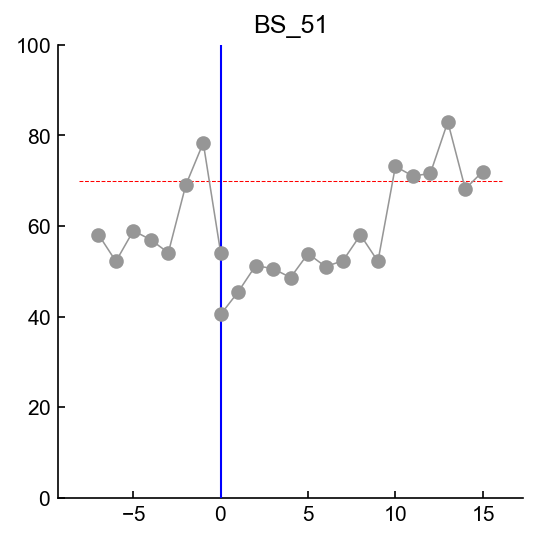

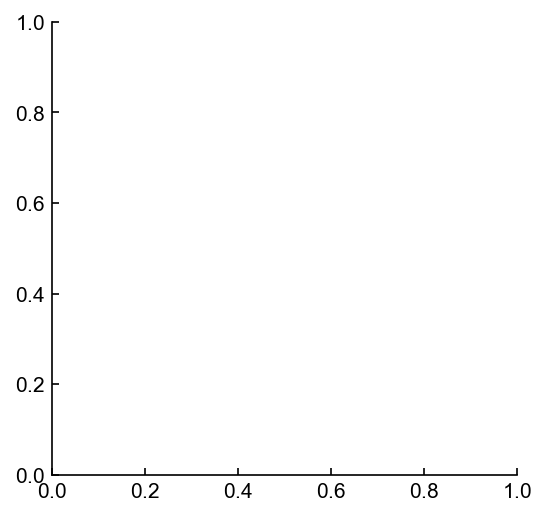

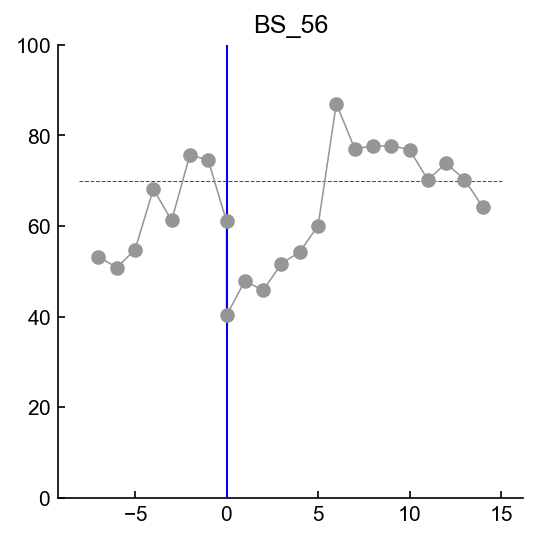

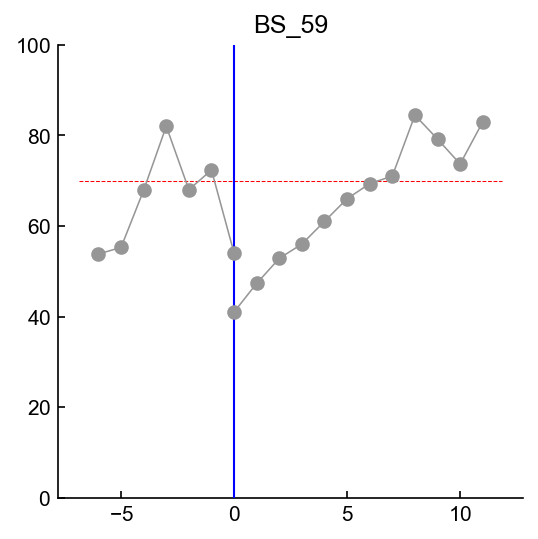

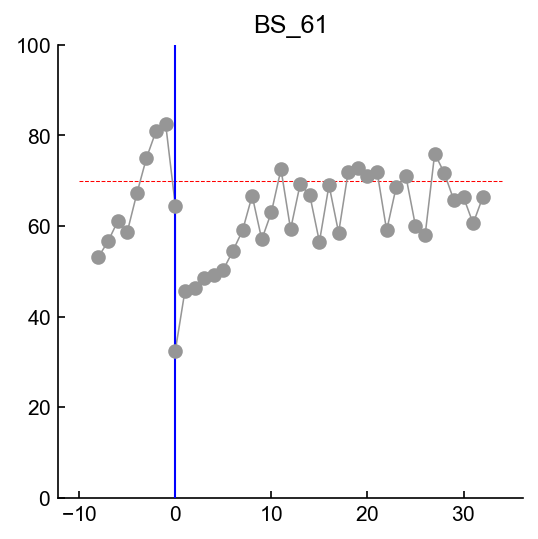

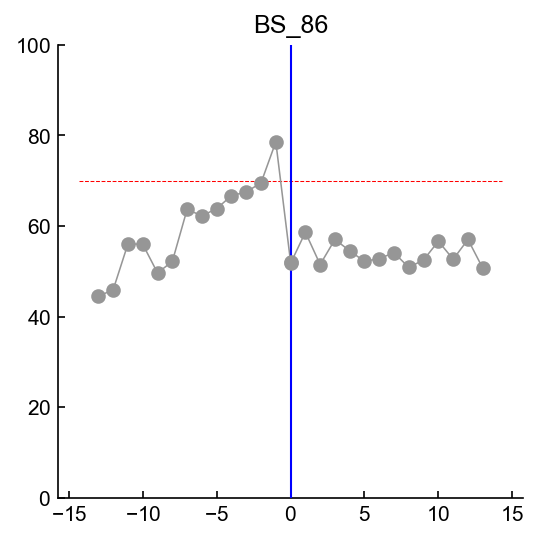

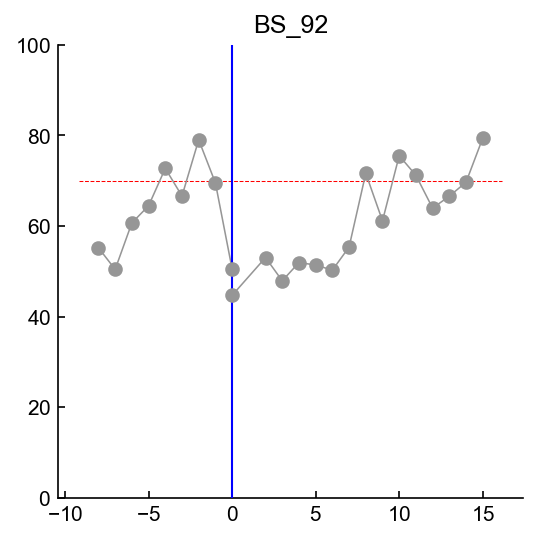

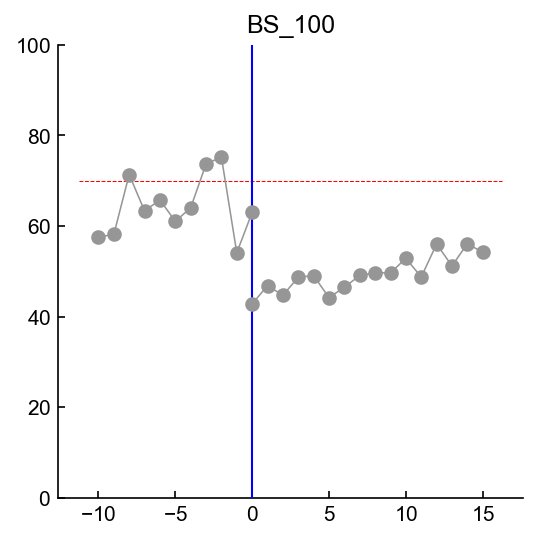

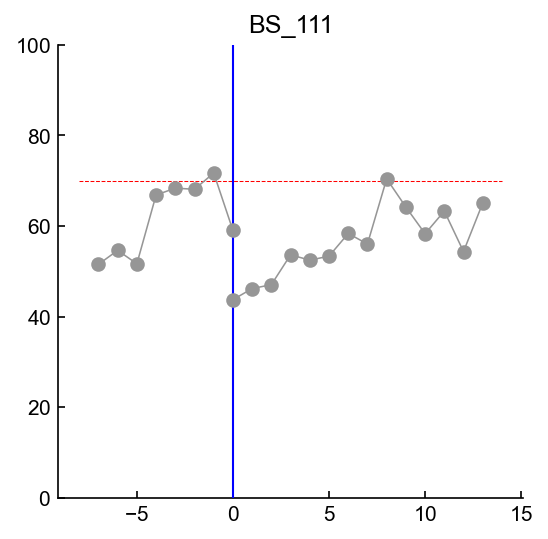

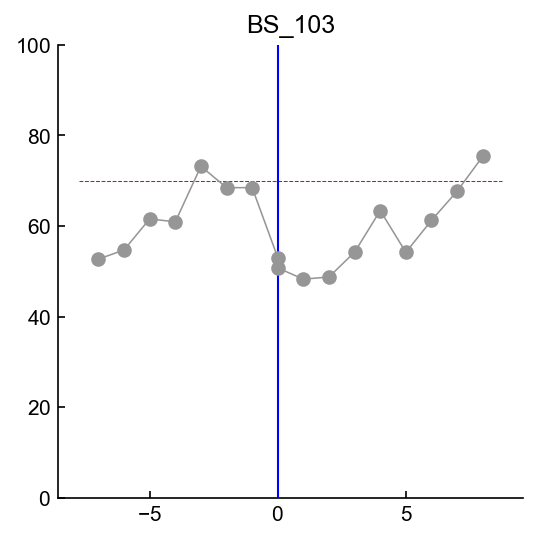

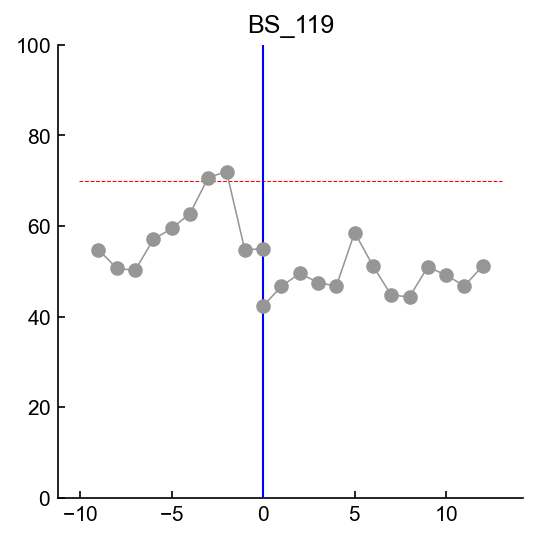

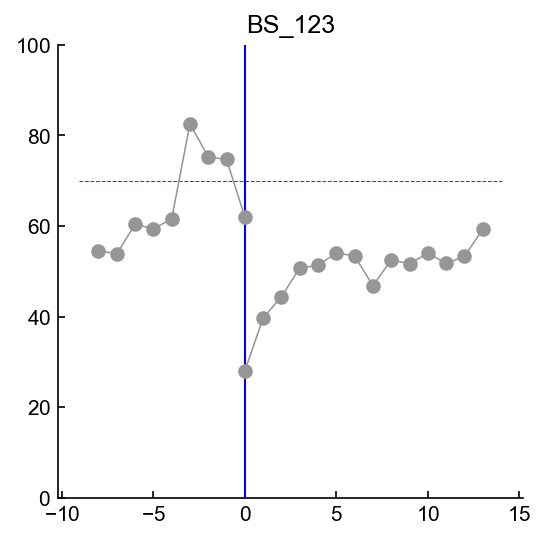

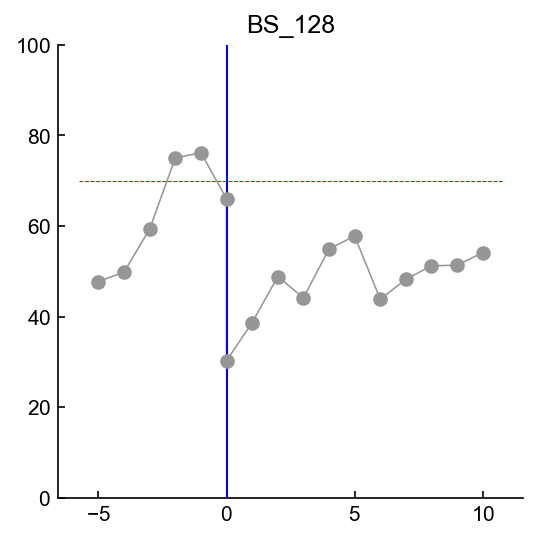

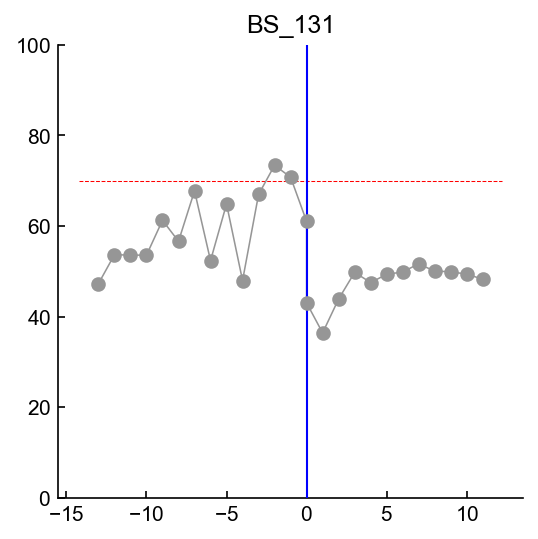

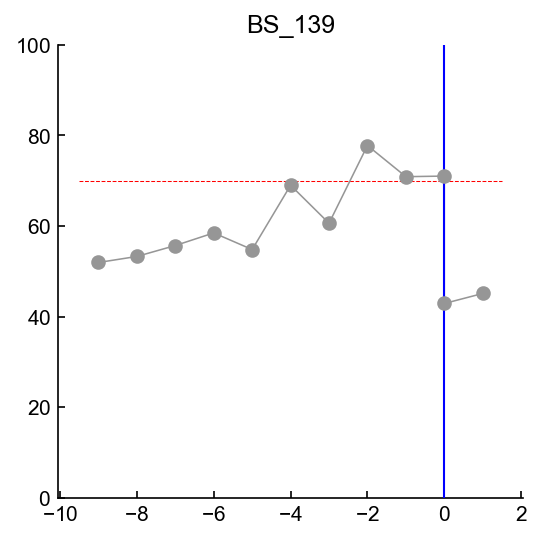

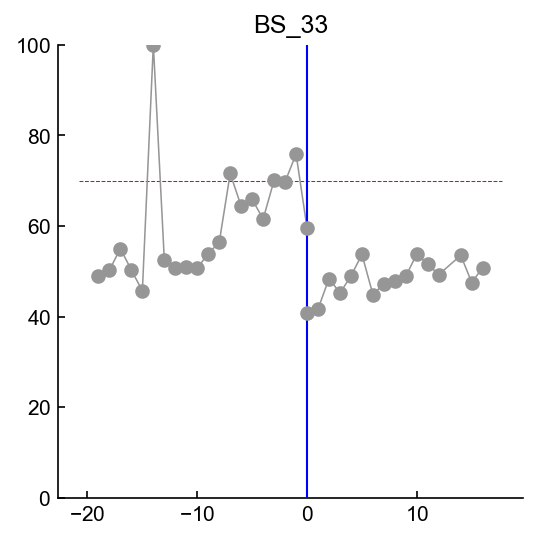

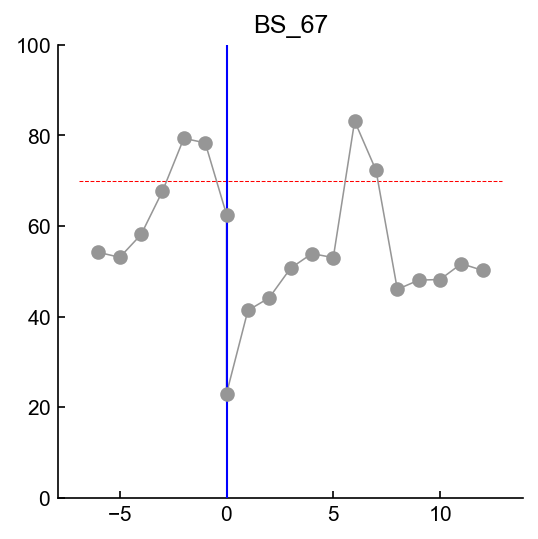

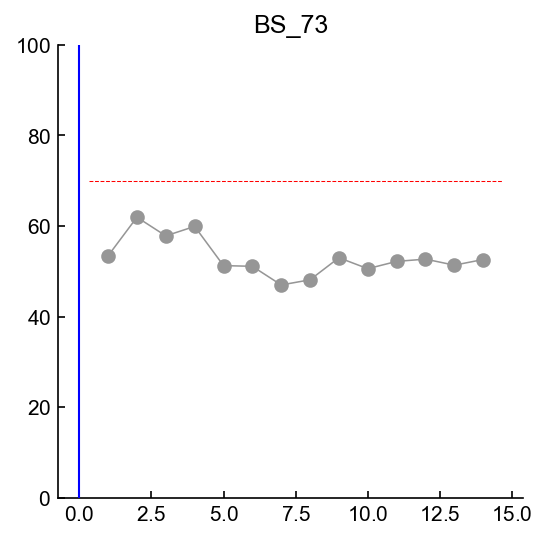

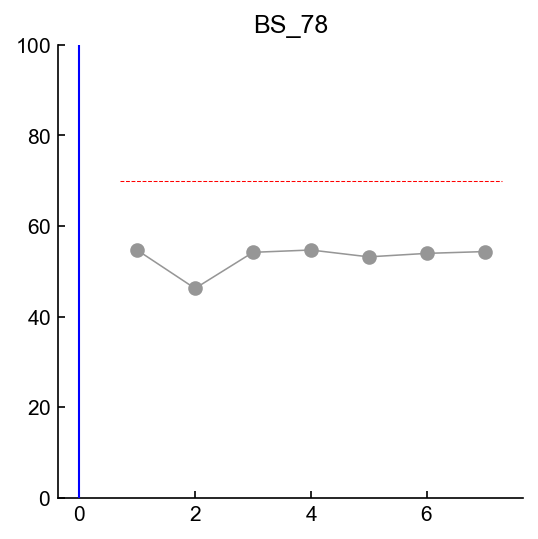

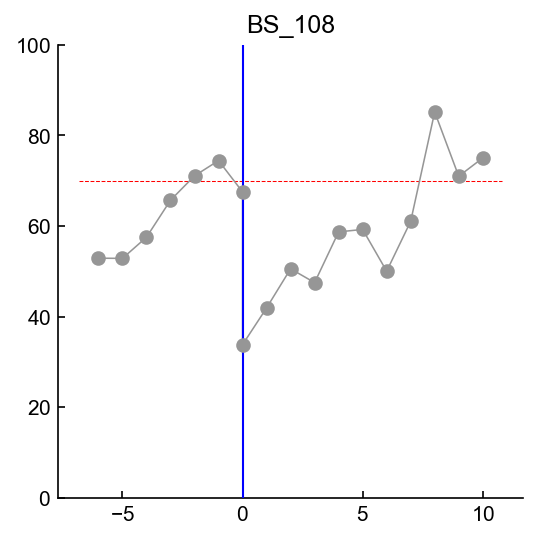

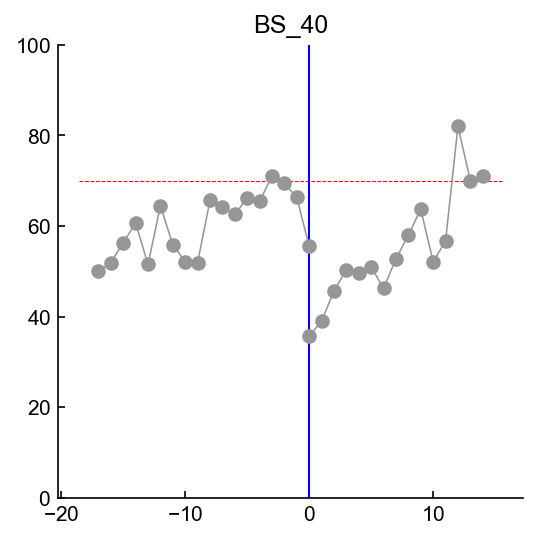

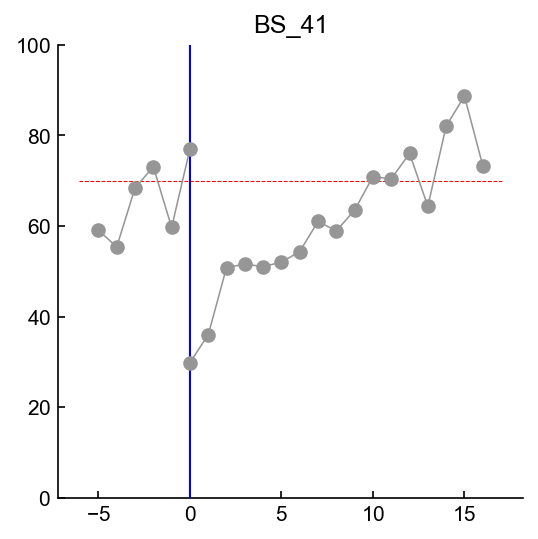

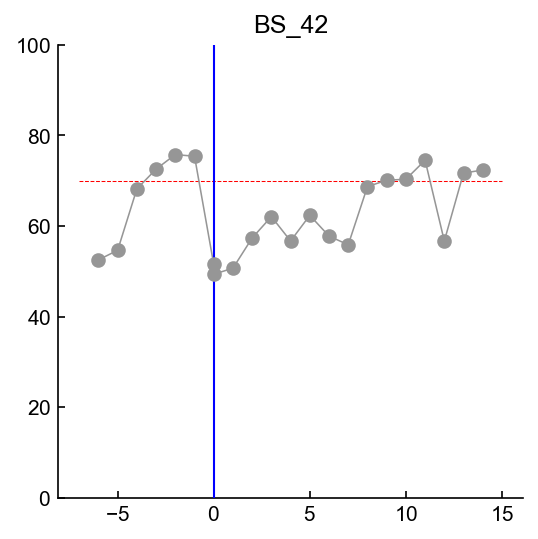

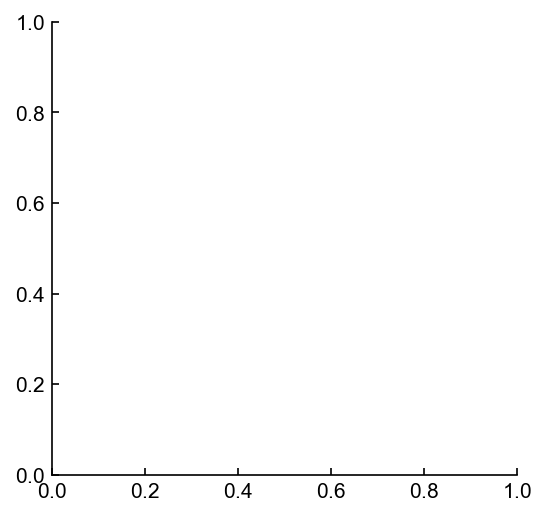

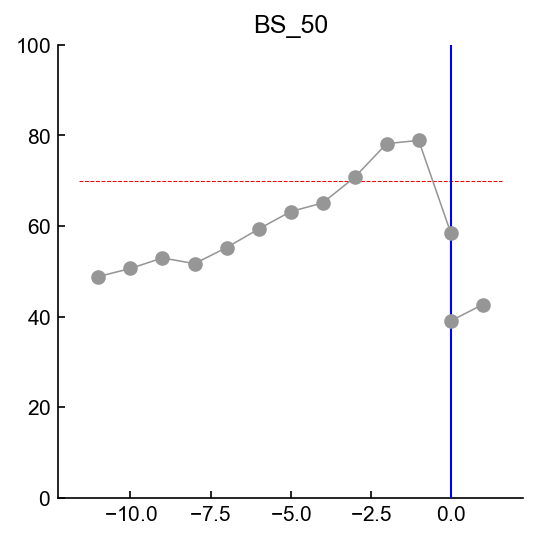

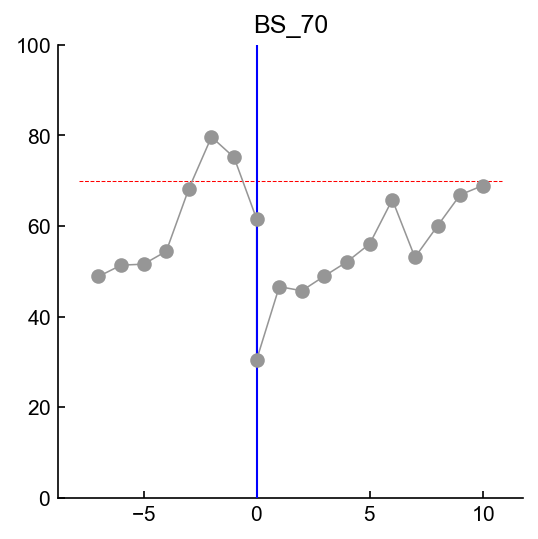

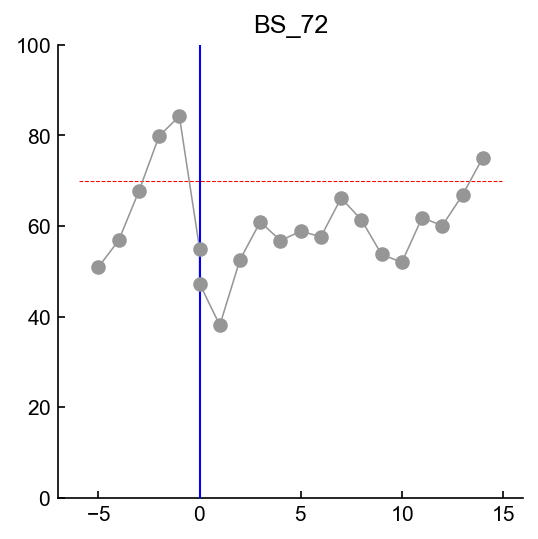

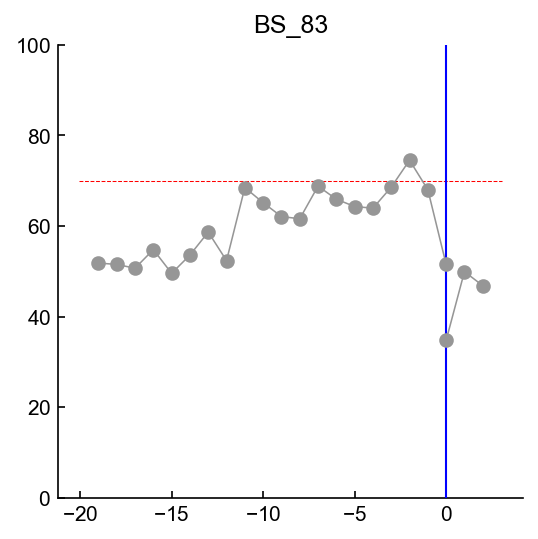

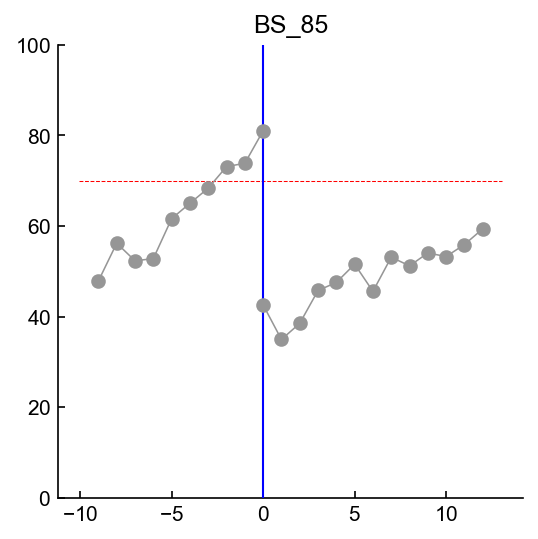

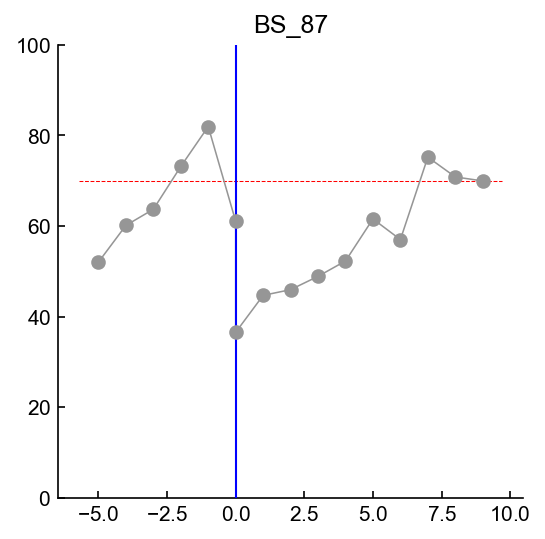

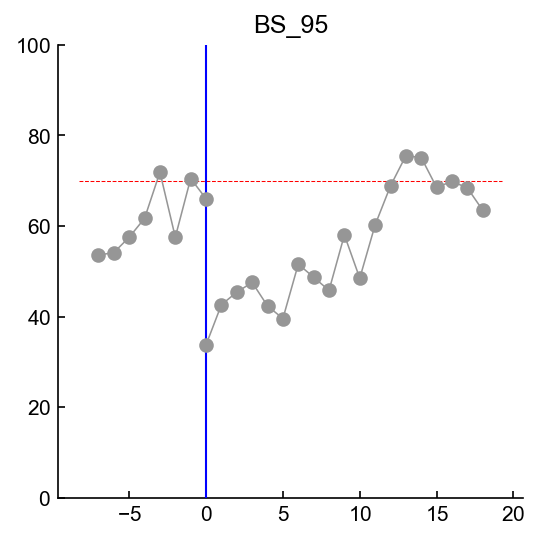

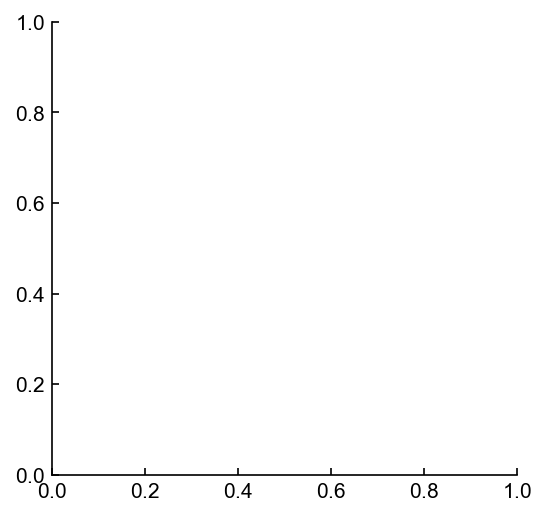

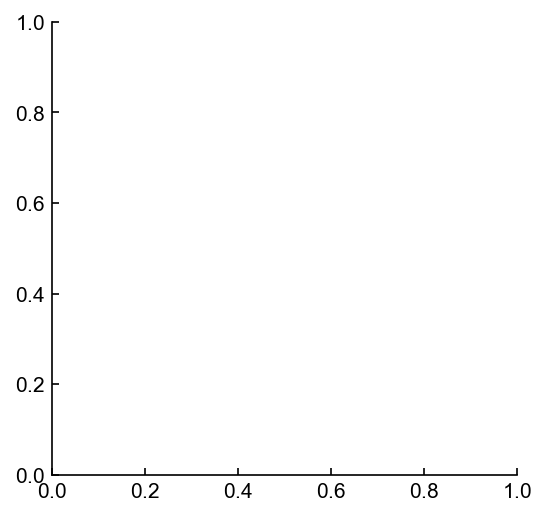

In [10]:
for animalnum,animal in enumerate([an for an in animalBehaviors]):
    fig,ax = plt.subplots(figsize=(4,4))
    
    #print(animal)
    
    if animal in ['BS_52','BS_49','BS_113']:
        continue
    
    rev = animalBehaviors[animal].reversal
    if np.isnan(rev):
        print('ERROR: NO REVERSAL DAY')
        rev = 0
    
    sessionsOfTraining = [s for s in animalBehaviors[animal].sessions]
    #print(sessionsOfTraining)
    
    days_perf_tuples = []
    for sessionOfTraining in sessionsOfTraining:
        #print(sessionOfTraining)
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['prereversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].pre_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['postreversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].post_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
            
            #if(perf > 0.70):
            #    break
            
    #print(days_perf_tuples)
            
    days = []
    perfs = []
    for day,perf in days_perf_tuples:
        days.append(day)
        perfs.append(perf*100)
        
    ls='-'
    
    ax.plot(days,perfs,lw=0.75,linestyle=ls,color=GOOD_GREY)#,label=animals[animal].name)
    ax.scatter(days,perfs,color=GOOD_GREY,zorder=11)

    ax.set_ylim([0,100])
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    ax.plot(xlims,[70,70],color='red',lw=0.5,linestyle='--',zorder=-10)
    ax.plot([0,0],ylims,color='blue',lw=1,linestyle='-',zorder=10)
    #ax.set_xlim([xlims[0],15])
    ax.set_ylim(ylims)
    ax.set_title(animal)
    
#ax.set_ylabel('Behavioral performance (% correct)')
#ax.set_xlabel('Training session relative to reversal')

#plt.savefig(os.path.join('D:\\\\Figures','BehaviorPlots','total_pc.pdf'),transparent=False,facecolor="white")

# Learning Trajectories

BS_49
BS_113
BS_52


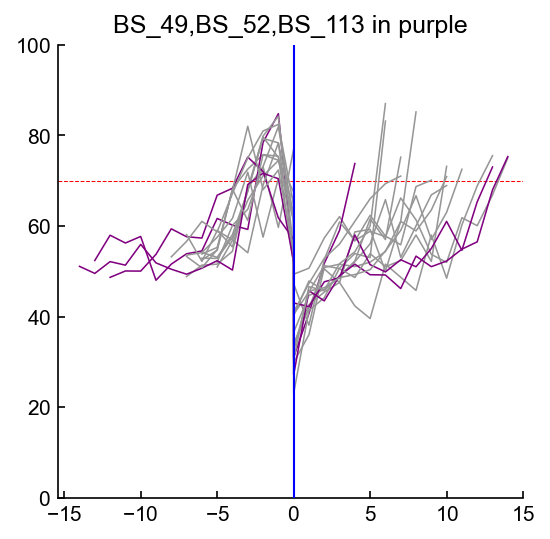

In [97]:
fig,ax = plt.subplots(figsize=(4,4))
for animalnum,animal in enumerate(noopsinnames):
    
    rev = animalBehaviors[animal].reversal
    if rev >= 10:
        print(animal)
    
    sessionsOfTraining = [s for s in animalBehaviors[animal].sessions]
    
    days_perf_tuples = []
    for sessionOfTraining in sessionsOfTraining:
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['prereversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].pre_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['postreversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].post_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
            
            if(perf > 0.70):
                break
            
    days = []
    perfs = []
    for day,perf in days_perf_tuples:
        days.append(day)
        perfs.append(perf*100)
        
    ls='-'
    
    if animal in ['BS_52','BS_49','BS_113']:
        ax.plot(days,perfs,lw=0.75,linestyle=ls,color='purple')#,label=animals[animal].name)
    else:
        ax.plot(days,perfs,lw=0.75,linestyle=ls,color=GOOD_GREY)#,label=animals[animal].name)

ax.set_title('BS_49,BS_52,BS_113 in purple')
        
ax.set_ylim([0,100])
    
xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.plot(xlims,[70,70],color='red',lw=0.5,linestyle='--',zorder=-10)
ax.plot([0,0],ylims,color='blue',lw=1,linestyle='-',zorder=10)
ax.set_xlim([xlims[0],15])
ax.set_ylim(ylims)
    
#ax.set_ylabel('Behavioral performance (% correct)')
#ax.set_xlabel('Training session relative to reversal')

plt.savefig(os.path.join('D:\\\\Figures','BehaviorPlots','total_with_misfits.pdf'),transparent=False,facecolor="white")

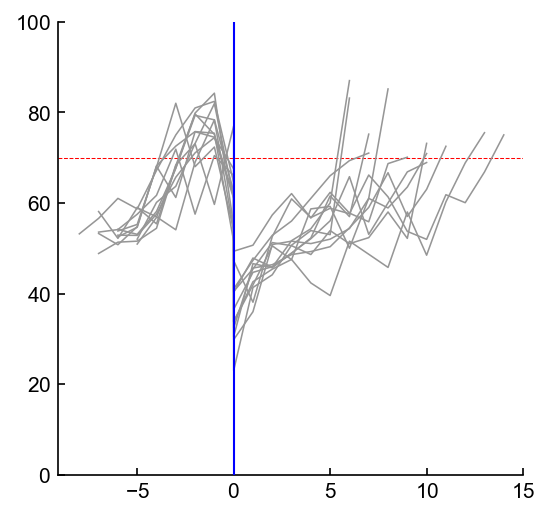

In [80]:
fig,ax = plt.subplots(figsize=(4,4))
for animalnum,animal in enumerate(noopsinnames):
    
    if animal in ['BS_52','BS_49','BS_113']:
        continue
    
    rev = animalBehaviors[animal].reversal
    if rev >= 10:
        print(animal)
    
    sessionsOfTraining = [s for s in animalBehaviors[animal].sessions]
    
    days_perf_tuples = []
    for sessionOfTraining in sessionsOfTraining:
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['prereversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].pre_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['postreversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].post_pc_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
            
            if(perf > 0.70):
                break
            
    days = []
    perfs = []
    for day,perf in days_perf_tuples:
        days.append(day)
        perfs.append(perf*100)
        
    ls='-'
    
    ax.plot(days,perfs,lw=0.75,linestyle=ls,color=GOOD_GREY)#,label=animals[animal].name)

ax.set_ylim([0,100])
    
xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.plot(xlims,[70,70],color='red',lw=0.5,linestyle='--',zorder=-10)
ax.plot([0,0],ylims,color='blue',lw=1,linestyle='-',zorder=10)
ax.set_xlim([xlims[0],15])
ax.set_ylim(ylims)
    
#ax.set_ylabel('Behavioral performance (% correct)')
#ax.set_xlabel('Training session relative to reversal')

plt.savefig(os.path.join('D:\\\\Figures','BehaviorPlots','total_pc.pdf'),transparent=False,facecolor="white")

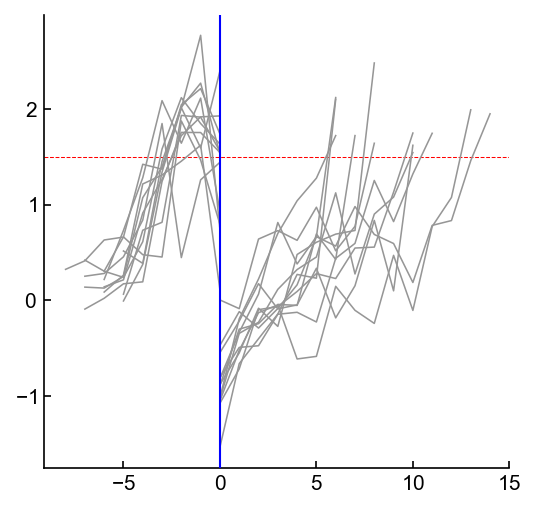

In [79]:
fig,ax = plt.subplots(figsize=(4,4))
for animalnum,animal in enumerate(noopsinnames):
    
    if animal in ['BS_52','BS_49','BS_113']:
        continue
    
    rev = animalBehaviors[animal].reversal
    if rev >= 10:
        print(animal)
    
    sessionsOfTraining = [s for s in animalBehaviors[animal].sessions]
    
    days_perf_tuples = []
    for sessionOfTraining in sessionsOfTraining:
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['prereversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].pre_dp_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
        if animalBehaviors[animal].sessions[sessionOfTraining].type in ['postreversal','switch']:
            perf = animalBehaviors[animal].sessions[sessionOfTraining].post_dp_sessions
            days_perf_tuples.append((sessionOfTraining-rev,perf))
            
            if(perf > 1.5):
                break
            
    days = []
    perfs = []
    for day,perf in days_perf_tuples:
        days.append(day)
        perfs.append(perf)
        
    ls='-'
    
    ax.plot(days,perfs,lw=0.75,linestyle=ls,color=GOOD_GREY)#,label=animals[animal].name)

#ax.set_ylim([0,100])
    
xlims = ax.get_xlim()
ylims = ax.get_ylim()
ax.plot(xlims,[1.5,1.5],color='red',lw=0.5,linestyle='--',zorder=-10)
ax.plot([0,0],ylims,color='blue',lw=1,linestyle='-',zorder=10)
ax.set_xlim([xlims[0],15])
ax.set_ylim(ylims)

ax.set_xticks([-5,0,5,10,15])
    
#ax.set_ylabel('Behavioral performance (d\')')
#ax.set_xlabel('Training session relative to reversal')

plt.savefig(os.path.join('D:\\\\Figures','BehaviorPlots','total_dp.pdf'),transparent=False,facecolor="white")

# Early/Middle Cutoff

In [13]:
#filename = os.path.join('C:\\\\Users','insan','Desktop','DataForJMT.csv')
filename = os.path.join('C:\\\\Users','4thgr','Desktop','DataForJMT.csv')
csv = pd.read_csv(filename)

plot=False
if plot:
    fig = plt.figure(figsize=(10,10))
    gs = fig.add_gridspec(4,4,hspace=0.5)
    axs = [plt.subplot(gs[i,j]) for i,j in product(range(4),range(4))]

premiddlecutoffs = dict()
postmiddlecutoffs = dict()
for animalidx,animal in enumerate(animals):
    
    condname = 'd\' ' + animal
    days = np.array(list(csv['Day']))
    cond = csv[condname]
    
    #Correct for double reversal days
    for idx,day in enumerate(days):
        if day > animals[animal].reversal:
            days[idx] = day-1
    #days = days - animals[animal].reversal
    
    prereversaldays = []
    prereversaldps = []
    maxreversaldp = -np.Inf
    minreversaldp = np.Inf
    postreversaldays = []
    postreversaldps = []
    for idx,day in enumerate(days):
        if day < animals[animal].reversal:
            prereversaldays.append(day)
            prereversaldps.append(cond[idx])
        if day == animals[animal].reversal:
            maxreversaldp = max(cond[idx],maxreversaldp)
            minreversaldp = min(cond[idx],minreversaldp)
        if day > animals[animal].reversal and not np.isnan(cond[idx]):
            postreversaldays.append(day)
            postreversaldps.append(cond[idx])
            
    #Prereversal threshold
    maxperf = np.nanmax(np.concatenate((prereversaldps,[maxreversaldp])))
    minperf = np.nanmin(prereversaldps)
    prethreshold = minperf + 0.4*(maxperf-minperf)
    #Postreversal threshold
    maxperf = np.nanmax(postreversaldps)
    minperf = np.nanmin(np.concatenate((postreversaldps,[minreversaldp])))
    postthreshold = minperf + 0.4*(maxperf-minperf)
    
    prereversaldays = np.array(prereversaldays)
    prereversaldps = np.array(prereversaldps)
    postreversaldays = np.array(postreversaldays)
    postreversaldps = np.array(postreversaldps)
    
    premiddlebool = np.greater_equal(prereversaldps,prethreshold)
    for idx,day in enumerate(prereversaldays):
        if premiddlebool[idx]:
            premiddlebool[idx:(len(premiddlebool)-1)].fill(True)
        #if not premiddlebool[idx]:
        #    premiddlebool[0:idx].fill(False)
    if np.any(premiddlebool):
        premiddlefirstday = np.min(prereversaldays[premiddlebool])
    else:
        premiddlefirstday = np.Inf
                     
    postmiddlebool = np.greater_equal(postreversaldps,postthreshold)
    for idx,day in enumerate(postreversaldays):
        if postmiddlebool[idx]:
            postmiddlebool[idx:(len(postmiddlebool)-1)].fill(True)
        #if not postmiddlebool[idx]:
        #    postmiddlebool[0:idx].fill(False)
    if np.any(postmiddlebool):
        postmiddlefirstday = np.min(postreversaldays[postmiddlebool])
    else:
        postmiddlefirstday = np.Inf
        
    premiddlecutoffs[animal] = premiddlefirstday
    postmiddlecutoffs[animal] = postmiddlefirstday
    
    if plot:
        ax = axs[animalidx]    
        #All Days no color
        ax.plot(days,cond,color='k',lw=1)
        ax.scatter(days,cond,color='k',s=10,zorder=9)
        #Pre Middle
        premiddle = np.logical_and( np.greater_equal(days,premiddlefirstday),np.less(days,animals[animal].reversal) )
        ax.scatter(days[premiddle],cond[premiddle],color='r',s=20,zorder=10)
        #Post Middle
        postmiddle = np.greater_equal(days,postmiddlefirstday)
        ax.scatter(days[postmiddle],cond[postmiddle],color='r',s=20,zorder=10)
        #Switch
        switch = np.equal(days,animals[animal].reversal)
        ax.scatter(days[switch],cond[switch],color='b',s=20,zorder=10)

        xlims = ax.get_xlim()
        ax.plot(xlims,[1.5,1.5],c='g',linestyle='--',lw=1,zorder=-10)
        ax.set_xlim(xlims)
        ax.set_ylim([-2,3])

        ax.set_title(animal)
if plot:
    plt.savefig(os.path.join('D:\\\\TempFigures','Middle cutoff.png'),transparent=False,facecolor="white")

In [1]:
threshold = 0.1

C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


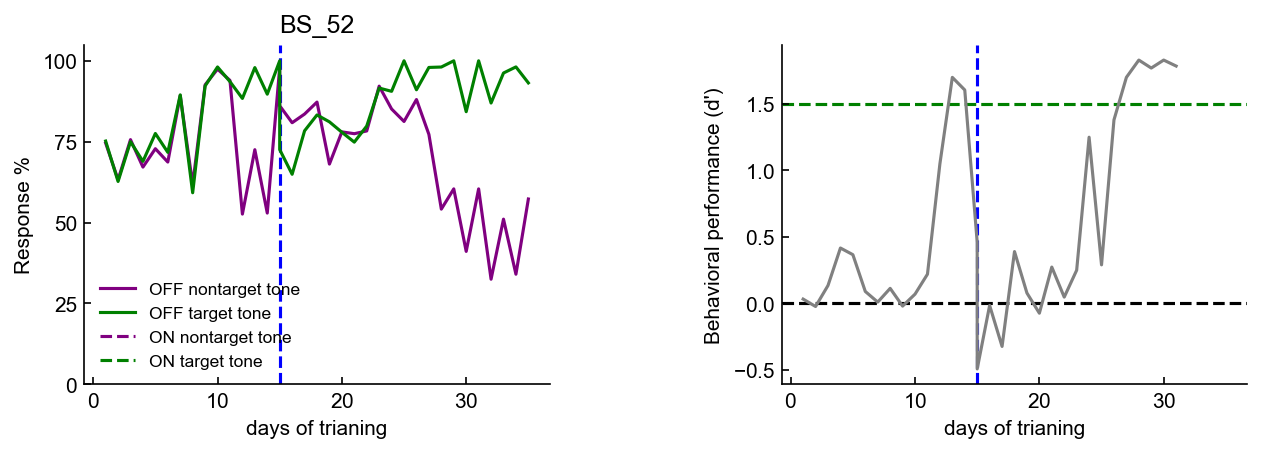

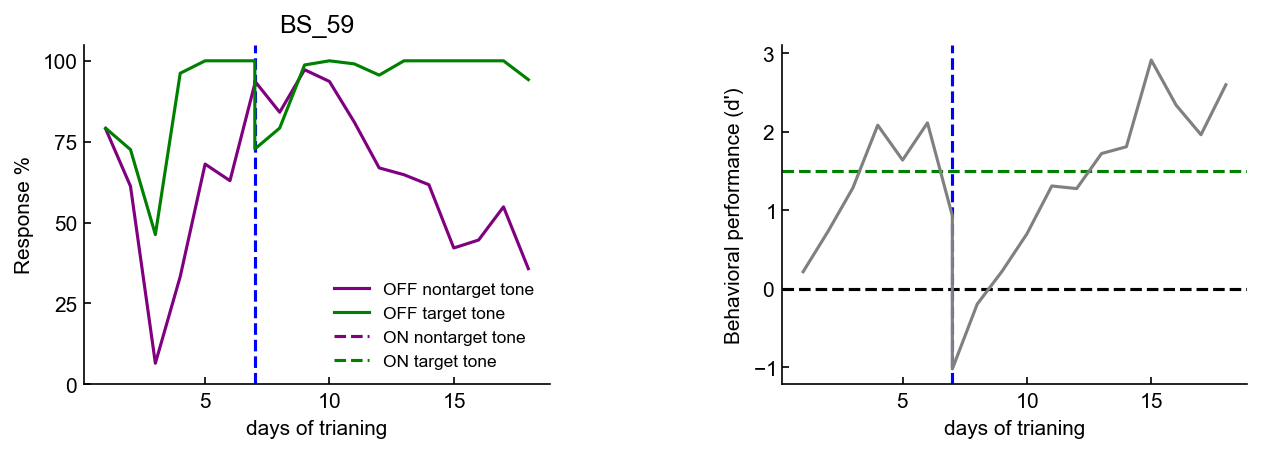

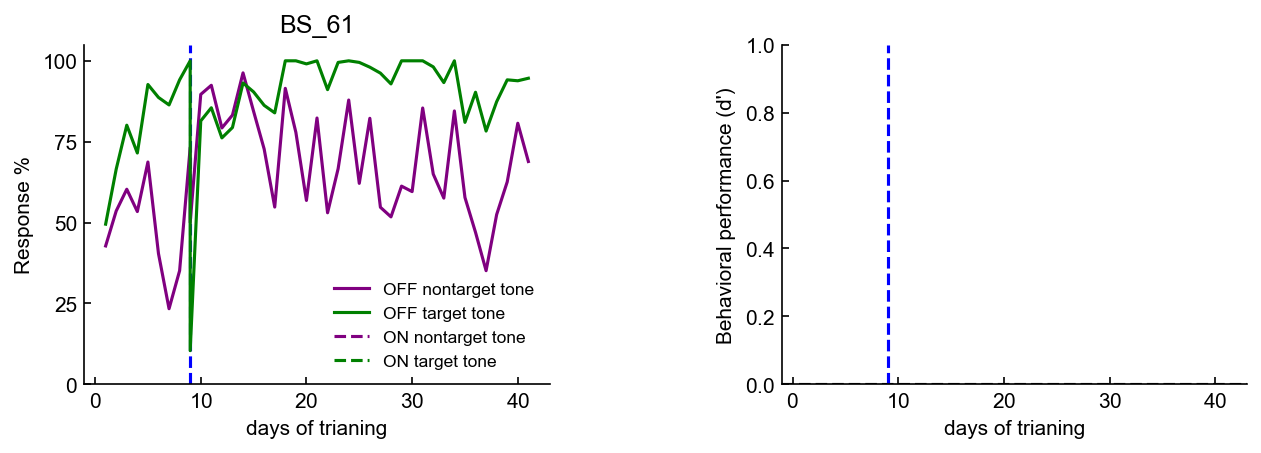

In [7]:
for animalname in animalBehaviors:
    #plt.close('all')
    #fig, ax = plt.subplots(figsize=(5,3))
    
    fig = plt.figure(figsize=(10,3))
    gs = fig.add_gridspec(1,2,hspace=0.2,wspace=0.5)
    ax = plt.subplot(gs[0,0])#Raster
    ax_perf = plt.subplot(gs[0,1],sharex=ax)#PSTH
    
    days = []
    perseverationcriterion = []
    explorationcriterion = []
    refinementcriterion = []
    dp = []
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.offPreBehavior.hits
                misses = thissession.offPreBehavior.misses
                falarms = thissession.offPreBehavior.falarms
                crejects = thissession.offPreBehavior.crejects
                
                try:
                    dp.append(thissession.preDP)
                except:
                    pass

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
            except Exception as e:
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects
                
                try:
                    dp.append(thissession.postDP)
                except:
                    pass

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
            except Exception as e:
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    ax.plot(days,perseverationcriterion,color='purple',label='OFF nontarget tone')
    #ax.plot(days,explorationcriterion,color='grey',label='OFF all tones')
    ax.plot(days,refinementcriterion,color='green',label='OFF target tone')
    
    try:
        ax_perf.plot(days,dp,color='grey')
    except:
        pass
    
    #########################################################################################################
    
    days = []
    perseverationcriterion = []
    explorationcriterion = []
    refinementcriterion = []
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.onPreBehavior.hits
                misses = thissession.onPreBehavior.misses
                falarms = thissession.onPreBehavior.falarms
                crejects = thissession.onPreBehavior.crejects

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
            except Exception as e:
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.onPostBehavior.hits
                misses = thissession.onPostBehavior.misses
                falarms = thissession.onPostBehavior.falarms
                crejects = thissession.onPostBehavior.crejects

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
            except Exception as e:
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    ax.plot(days,perseverationcriterion,color='purple',linestyle='--',label='ON nontarget tone')
    #ax.plot(days,explorationcriterion,color='grey',linestyle='--',label='ON all tones')
    ax.plot(days,refinementcriterion,color='green',linestyle='--',label='ON target tone')
    
    #########################################################################################################
    
    ax.set_ylim(0,1.05)
    ax.set_yticks([0,0.25,0.5,0.75,1])
    ax.set_yticklabels(['0','25','50','75','100'])
    
    ax.plot([animalBehaviors[animalname].reversal]*2,[0,1.05],color='blue',linestyle='--',zorder=-10)
    
    ylims = ax_perf.get_ylim()
    ax_perf.plot([animalBehaviors[animalname].reversal]*2,ylims,color='blue',linestyle='--',zorder=-10)
    ax_perf.set_ylim(ylims)
    xlims = ax_perf.get_xlim()
    ax_perf.plot(xlims,[0]*2,color='k',linestyle='--',zorder=-11)
    ax_perf.plot(xlims,[1.5]*2,color='green',linestyle='--',zorder=-11)
    ax_perf.set_xlim(xlims)
    
    ax.set_ylabel('Response %')
    ax_perf.set_ylabel('Behavioral performance (d\')')
    ax.set_xlabel('days of trianing')
    ax_perf.set_xlabel('days of trianing')
    ax.legend(frameon=False)
    ax.set_title(animalname)
    
    #break
    fig.savefig(os.path.join('D:\\\\Figures','Learning Phases 2 Opsin',animalname + ' Learning Phases.png'),transparent=False,facecolor="white")

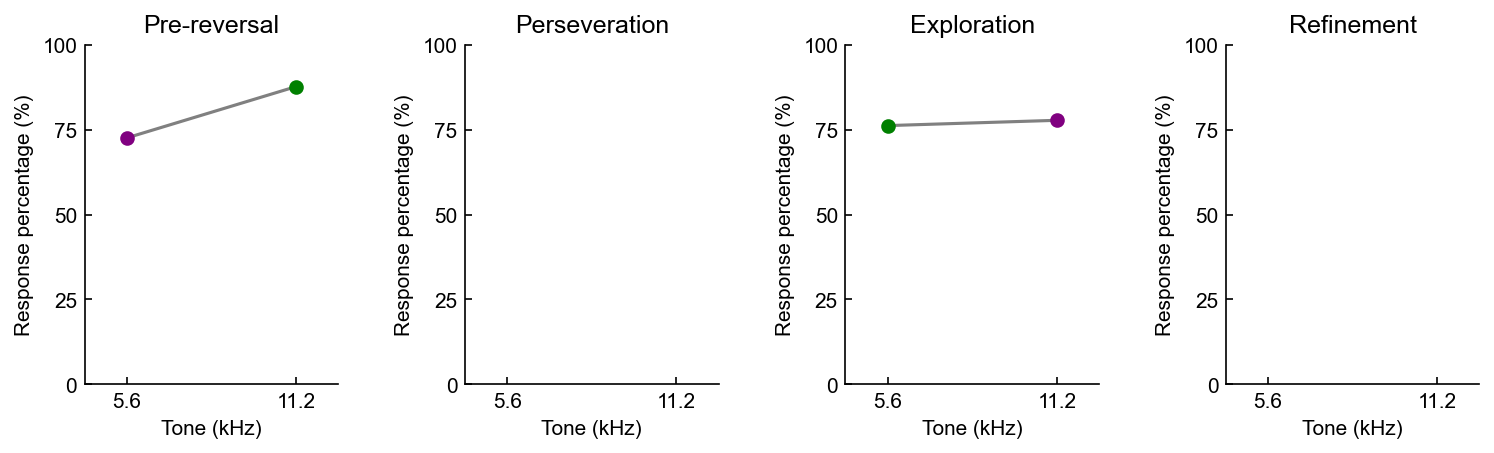

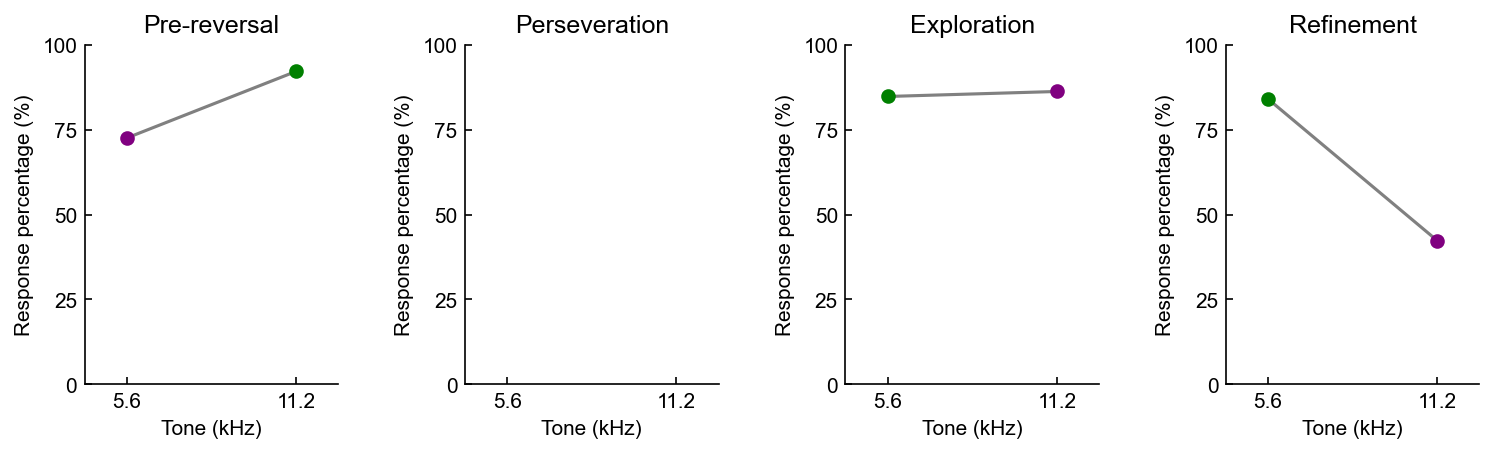

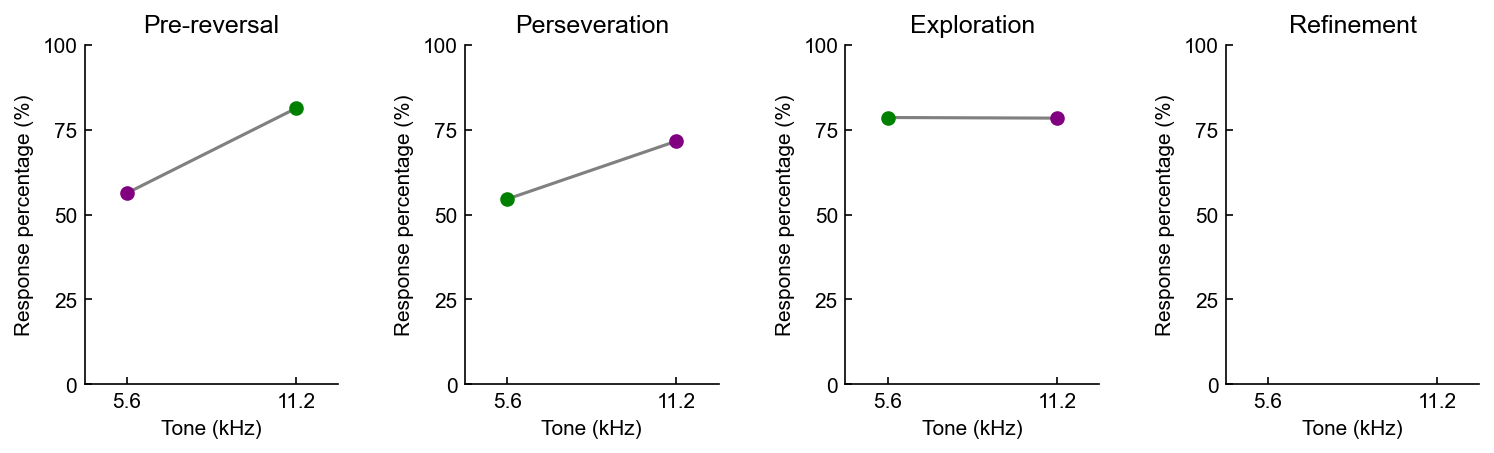

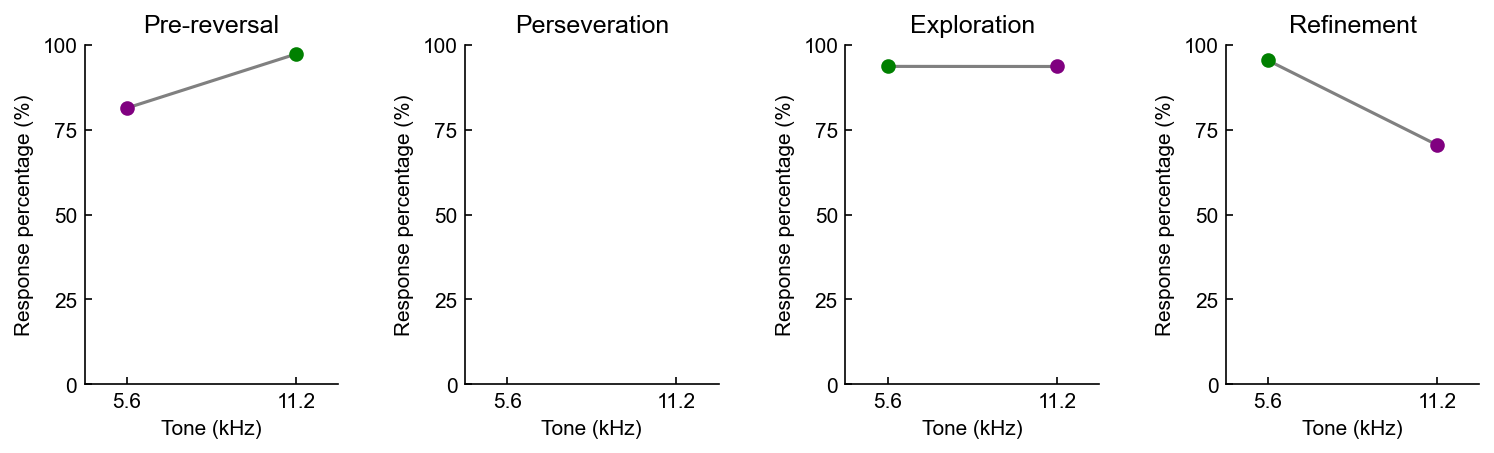

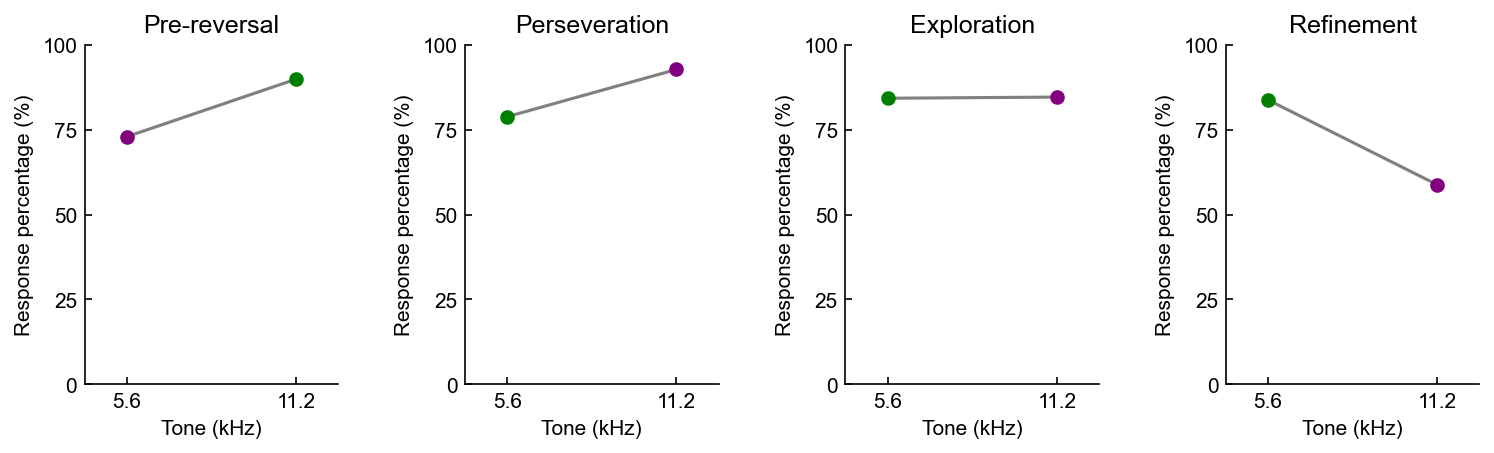

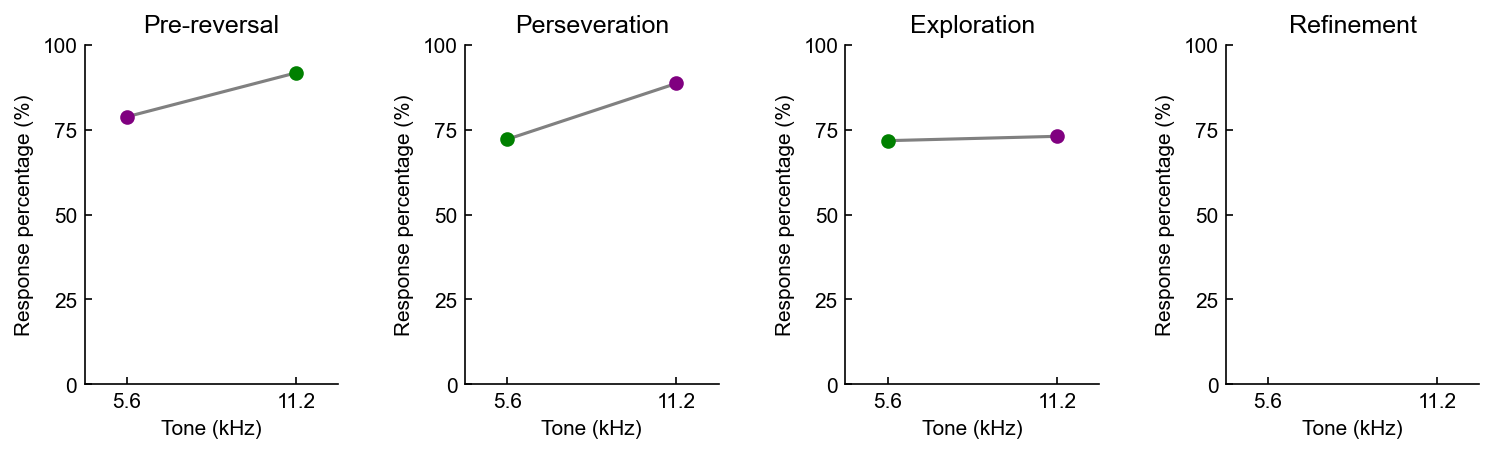

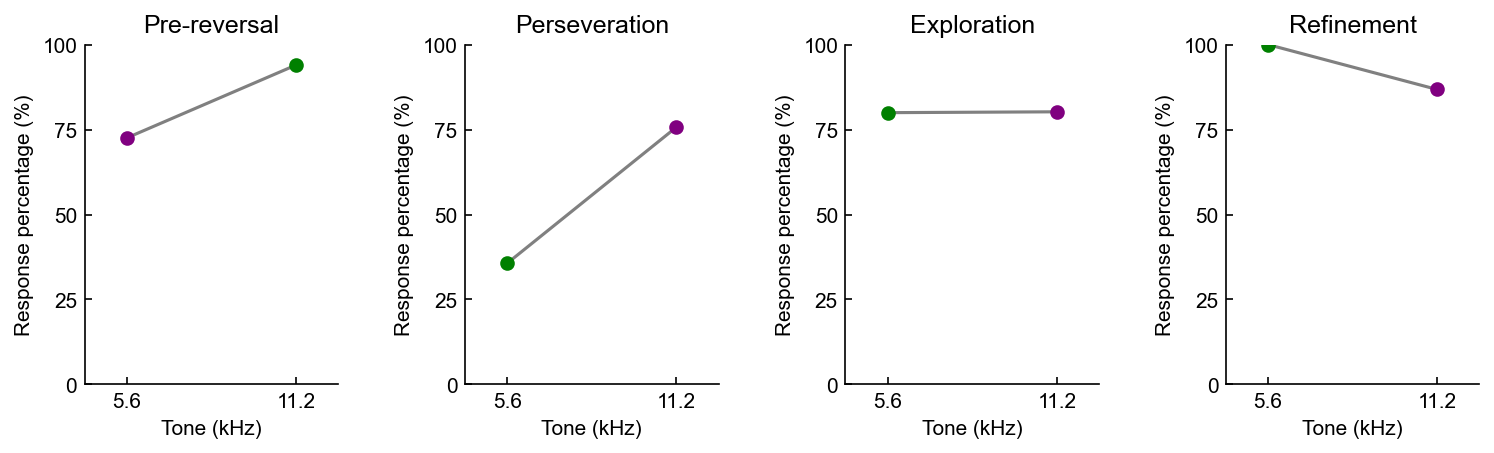

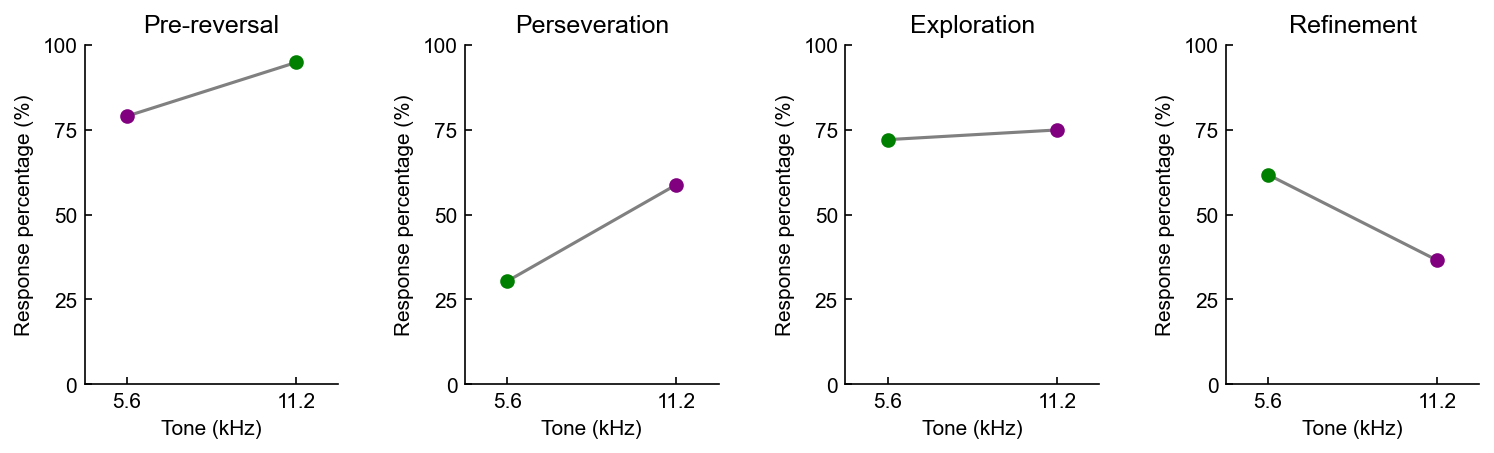

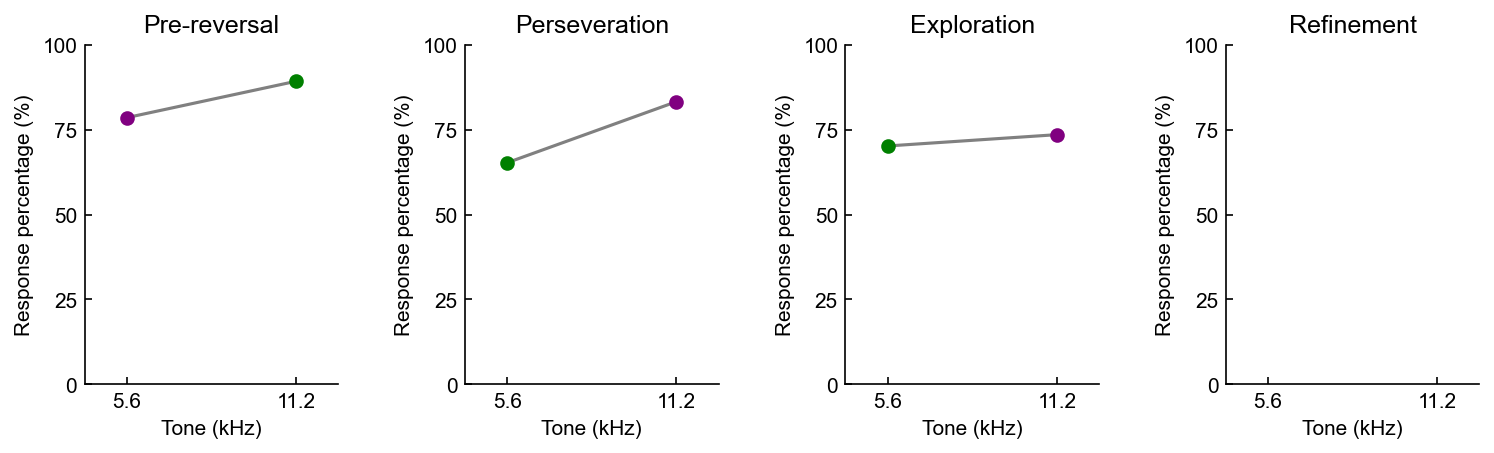

In [68]:
threshold = 0.1

animalnamestouse = opsinnames
for animalname in animalnamestouse:
    #plt.close('all')
    #fig, ax = plt.subplots(figsize=(5,3))
    
    prerev11 = []
    prerev5 = []
    perseveration11 = []
    perseveration5 = []
    exploration11 = []
    exploration5 = []
    refinement11 = []
    refinement5 = []
    
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.offPreBehavior.hits
                misses = thissession.offPreBehavior.misses
                falarms = thissession.offPreBehavior.falarms
                crejects = thissession.offPreBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)
                
                percent5 = (falarms / (falarms+crejects))
                percent11 = ( hits / (hits+misses) )
                
                if explorationcriterion >= 0.1:
                    prerev11.append(percent11)
                    prerev5.append(percent5)
                
            except Exception as e:
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)

                percent11 = (falarms / (falarms+crejects))
                percent5 = ( hits / (hits+misses) )
                
                if explorationcriterion >= 0.1:
                    criterion = percent5 - percent11
                    if criterion <= -threshold:
                        perseveration11.append(percent11)
                        perseveration5.append(percent5)
                    elif criterion >= threshold:
                        refinement11.append(percent11)
                        refinement5.append(percent5)
                    else:
                        exploration11.append(percent11)
                        exploration5.append(percent5)
            except Exception as e:
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    #########################################################################################################
    
    fig = plt.figure(figsize=(12,3))
    gs = fig.add_gridspec(1,4,hspace=0.2,wspace=0.5)
    ax1 = plt.subplot(gs[0,0])
    ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)
    ax3 = plt.subplot(gs[0,2],sharex=ax1,sharey=ax1)
    ax4 = plt.subplot(gs[0,3],sharex=ax1,sharey=ax1)
    
    ax1.plot([0,1],[np.mean(prerev5),np.mean(prerev11)],color='grey',zorder=-10)
    ax1.scatter([0],[np.mean(prerev5)],color='purple')
    ax1.scatter([1],[np.mean(prerev11)],color='green')
    ###
    ax1.set_xlim(-0.25,1.25)
    ax1.set_xticks([0,1])
    ax1.set_xticklabels(['5.6','11.2'])
    ax1.set_xlabel('Tone (kHz)')
    ###
    ax1.set_ylim([0,1])
    ax1.set_yticks([0,0.25,0.5,0.75,1])
    ax1.set_yticklabels(['0','25','50','75','100'])
    ax1.set_ylabel('Response percentage (%)')
    ax1.set_title('Pre-reversal')
    
    ax2.plot([0,1],[np.mean(perseveration5),np.mean(perseveration11)],color='grey',zorder=-10)
    ax2.scatter([0],[np.mean(perseveration5)],color='green')
    ax2.scatter([1],[np.mean(perseveration11)],color='purple')
    ###
    ax2.set_xlim(-0.25,1.25)
    ax2.set_xticks([0,1])
    ax2.set_xticklabels(['5.6','11.2'])
    ax2.set_xlabel('Tone (kHz)')
    ###
    ax2.set_ylim([0,1])
    ax2.set_yticks([0,0.25,0.5,0.75,1])
    ax2.set_yticklabels(['0','25','50','75','100'])
    ax2.set_ylabel('Response percentage (%)')
    ax2.set_title('Perseveration')
    
    ax3.plot([0,1],[np.mean(exploration5),np.mean(exploration11)],color='grey',zorder=-10)
    ax3.scatter([0],[np.mean(exploration5)],color='green')
    ax3.scatter([1],[np.mean(exploration11)],color='purple')
    ###
    ax3.set_xlim(-0.25,1.25)
    ax3.set_xticks([0,1])
    ax3.set_xticklabels(['5.6','11.2'])
    ax3.set_xlabel('Tone (kHz)')
    ###
    ax3.set_ylim([0,1])
    ax3.set_yticks([0,0.25,0.5,0.75,1])
    ax3.set_yticklabels(['0','25','50','75','100'])
    ax3.set_ylabel('Response percentage (%)')
    ax3.set_title('Exploration')
    
    ax4.plot([0,1],[np.mean(refinement5),np.mean(refinement11)],color='grey',zorder=-10)
    ax4.scatter([0],[np.mean(refinement5)],color='green')
    ax4.scatter([1],[np.mean(refinement11)],color='purple')
    ###
    ax4.set_xlim(-0.25,1.25)
    ax4.set_xticks([0,1])
    ax4.set_xticklabels(['5.6','11.2'])
    ax4.set_xlabel('Tone (kHz)')
    ###
    ax4.set_ylim([0,1])
    ax4.set_yticks([0,0.25,0.5,0.75,1])
    ax4.set_yticklabels(['0','25','50','75','100'])
    ax4.set_ylabel('Response percentage (%)')
    ax4.set_title('Refinement')
    
    #break
    fig.savefig(os.path.join('D:\\\\Figures','Learning Phases','Learning Phases Performance',animalname + ' Learning Phases.png'),transparent=False,facecolor="white")
    fig.savefig(os.path.join('D:\\\\Figures','Learning Phases','Learning Phases Performance',animalname + ' Learning Phases.pdf'),transparent=False,facecolor="white")

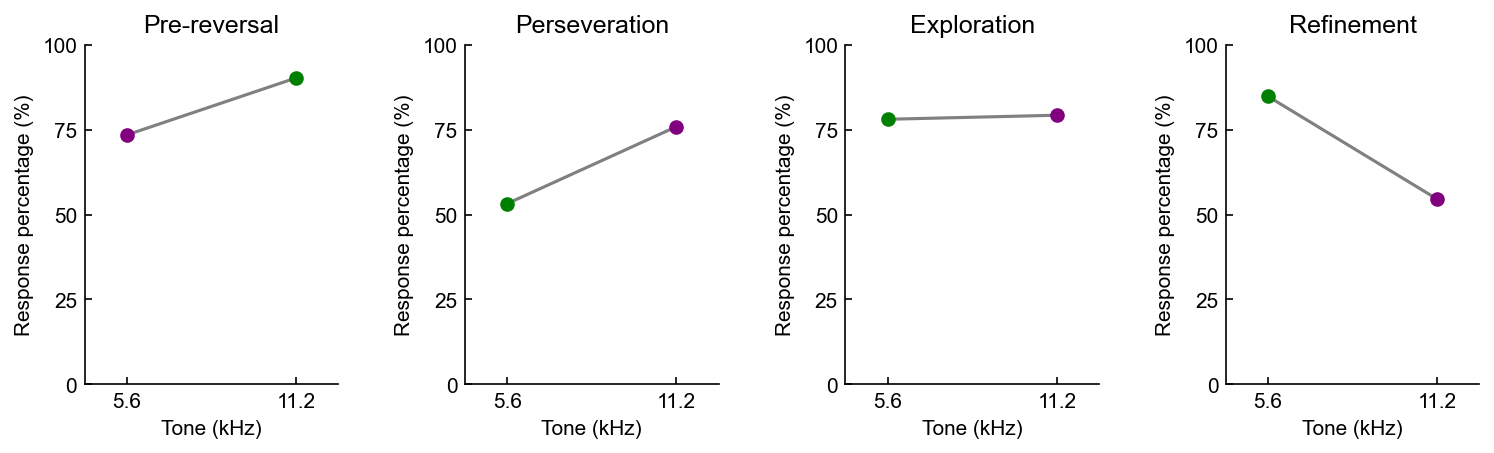

In [64]:
threshold = 0.1

prerev11 = []
prerev5 = []
perseveration11 = []
perseveration5 = []
exploration11 = []
exploration5 = []
refinement11 = []
refinement5 = []

animalnamestouse = opsinnames
for animalname in animalnamestouse:
    #plt.close('all')
    #fig, ax = plt.subplots(figsize=(5,3))

    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.offPreBehavior.hits
                misses = thissession.offPreBehavior.misses
                falarms = thissession.offPreBehavior.falarms
                crejects = thissession.offPreBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)
                
                percent5 = (falarms / (falarms+crejects))
                percent11 = ( hits / (hits+misses) )
                
                if explorationcriterion >= 0.1:
                    prerev11.append(percent11)
                    prerev5.append(percent5)
                
            except Exception as e:
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)

                percent11 = (falarms / (falarms+crejects))
                percent5 = ( hits / (hits+misses) )
                
                if explorationcriterion >= 0.1:
                    criterion = percent5 - percent11
                    if criterion <= -threshold:
                        perseveration11.append(percent11)
                        perseveration5.append(percent5)
                    elif criterion >= threshold:
                        refinement11.append(percent11)
                        refinement5.append(percent5)
                    else:
                        exploration11.append(percent11)
                        exploration5.append(percent5)
            except Exception as e:
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    #########################################################################################################
    
fig = plt.figure(figsize=(12,3))
gs = fig.add_gridspec(1,4,hspace=0.2,wspace=0.5)
ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[0,1],sharex=ax1,sharey=ax1)
ax3 = plt.subplot(gs[0,2],sharex=ax1,sharey=ax1)
ax4 = plt.subplot(gs[0,3],sharex=ax1,sharey=ax1)
    
ax1.plot([0,1],[np.mean(prerev5),np.mean(prerev11)],color='grey',zorder=-10)
ax1.scatter([0],[np.mean(prerev5)],color='purple')
ax1.scatter([1],[np.mean(prerev11)],color='green')
###
ax1.set_xlim(-0.25,1.25)
ax1.set_xticks([0,1])
ax1.set_xticklabels(['5.6','11.2'])
ax1.set_xlabel('Tone (kHz)')
###
ax1.set_ylim([0,1])
ax1.set_yticks([0,0.25,0.5,0.75,1])
ax1.set_yticklabels(['0','25','50','75','100'])
ax1.set_ylabel('Response percentage (%)')
ax1.set_title('Pre-reversal')
    
ax2.plot([0,1],[np.mean(perseveration5),np.mean(perseveration11)],color='grey',zorder=-10)
ax2.scatter([0],[np.mean(perseveration5)],color='green')
ax2.scatter([1],[np.mean(perseveration11)],color='purple')
###
ax2.set_xlim(-0.25,1.25)
ax2.set_xticks([0,1])
ax2.set_xticklabels(['5.6','11.2'])
ax2.set_xlabel('Tone (kHz)')
###
ax2.set_ylim([0,1])
ax2.set_yticks([0,0.25,0.5,0.75,1])
ax2.set_yticklabels(['0','25','50','75','100'])
ax2.set_ylabel('Response percentage (%)')
ax2.set_title('Perseveration')
    
ax3.plot([0,1],[np.mean(exploration5),np.mean(exploration11)],color='grey',zorder=-10)
ax3.scatter([0],[np.mean(exploration5)],color='green')
ax3.scatter([1],[np.mean(exploration11)],color='purple')
###
ax3.set_xlim(-0.25,1.25)
ax3.set_xticks([0,1])
ax3.set_xticklabels(['5.6','11.2'])
ax3.set_xlabel('Tone (kHz)')
###
ax3.set_ylim([0,1])
ax3.set_yticks([0,0.25,0.5,0.75,1])
ax3.set_yticklabels(['0','25','50','75','100'])
ax3.set_ylabel('Response percentage (%)')
ax3.set_title('Exploration')
    
ax4.plot([0,1],[np.mean(refinement5),np.mean(refinement11)],color='grey',zorder=-10)
ax4.scatter([0],[np.mean(refinement5)],color='green')
ax4.scatter([1],[np.mean(refinement11)],color='purple')
###
ax4.set_xlim(-0.25,1.25)
ax4.set_xticks([0,1])
ax4.set_xticklabels(['5.6','11.2'])
ax4.set_xlabel('Tone (kHz)')
###
ax4.set_ylim([0,1])
ax4.set_yticks([0,0.25,0.5,0.75,1])
ax4.set_yticklabels(['0','25','50','75','100'])
ax4.set_ylabel('Response percentage (%)')
ax4.set_title('Refinement')
    
#break
fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Performance.png'),transparent=False,facecolor="white")
fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Performance.pdf'),transparent=False,facecolor="white")

BS_86
[0.73214286 0.78571429 0.86610879 0.85925926 0.78913738 0.705
 0.8825     0.80617978 0.88410596 0.86907449 0.83333333 0.6
 0.6779661  0.99       0.82384449 0.7355219  0.80333884 0.687277
 0.82414009 0.92819954 0.72164878 0.86755952 0.69893314 0.89263496
 0.53720238 0.81370656 0.82698079 0.97151726]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]
BS_92
[0.8        0.95443038 0.90340909 0.8098434  0.84123711 0.75159236
 0.66666667 0.72777778 0.99       0.91096439 0.81810905 0.92433394
 0.90751258 0.92279158 0.86616733 0.62330413 0.33999122 0.79400922
 0.73       0.73831873 0.82530795 0.39       0.83717949 0.68181818]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]
BS_100
[0.778      0.71368421 0.74336283 0.87012987 0.67880795 0.77358491
 0.71794872 0.69924812 0.5

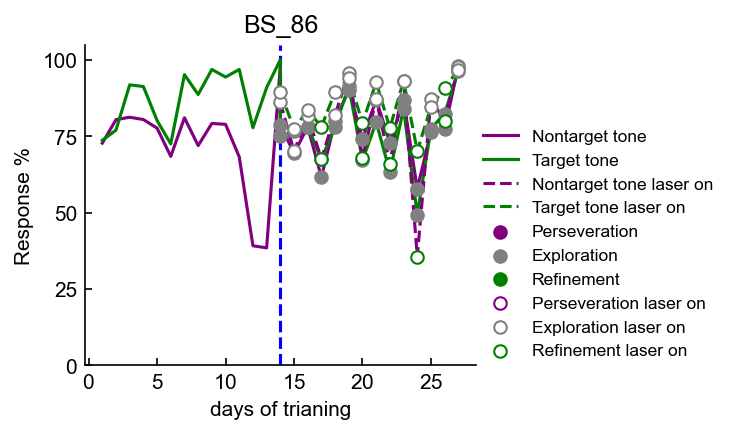

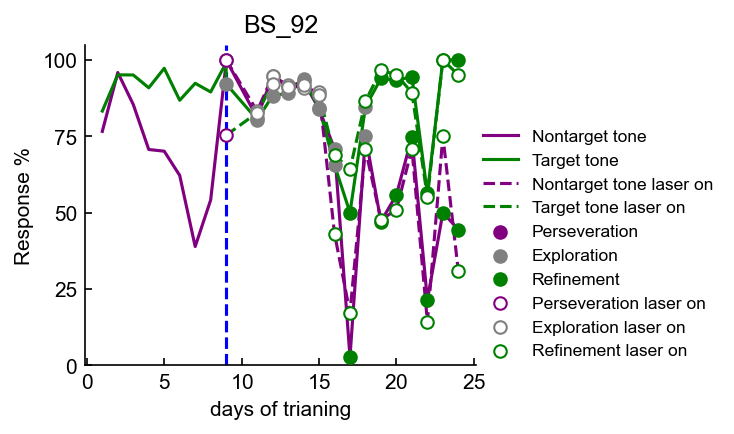

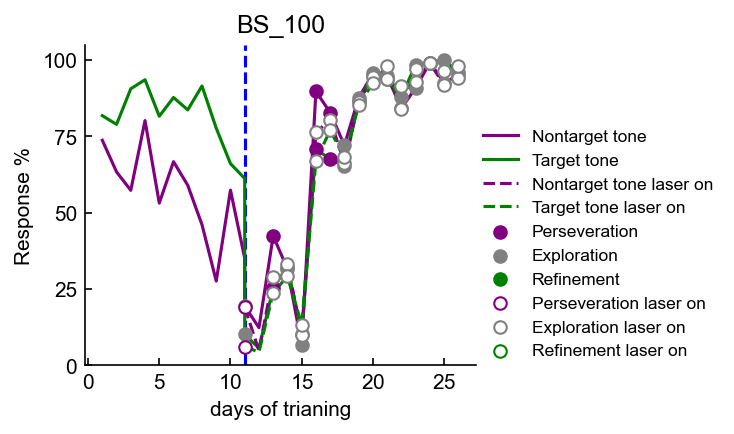

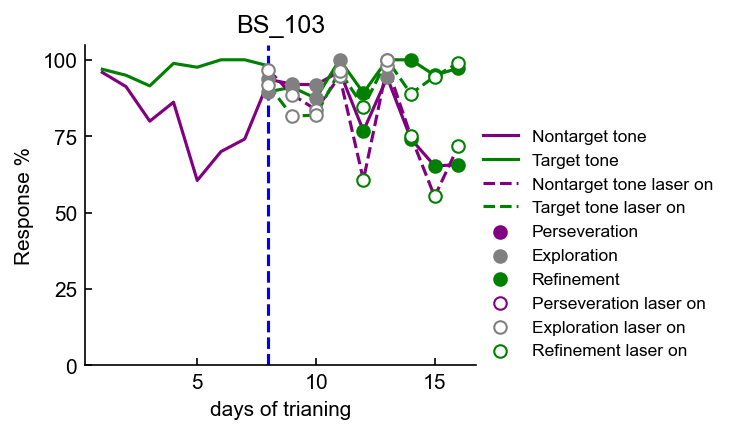

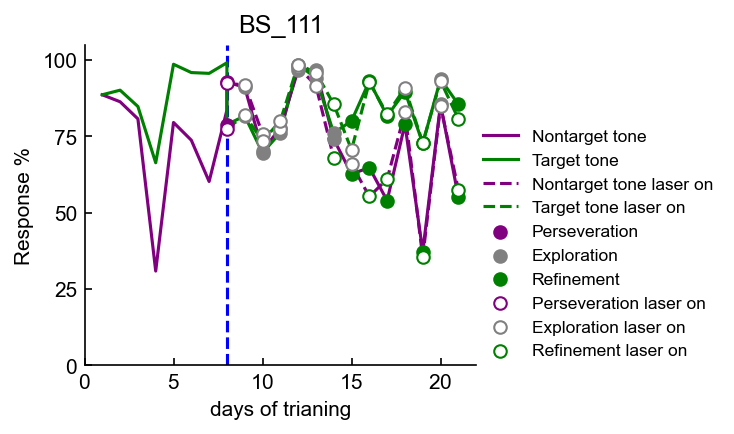

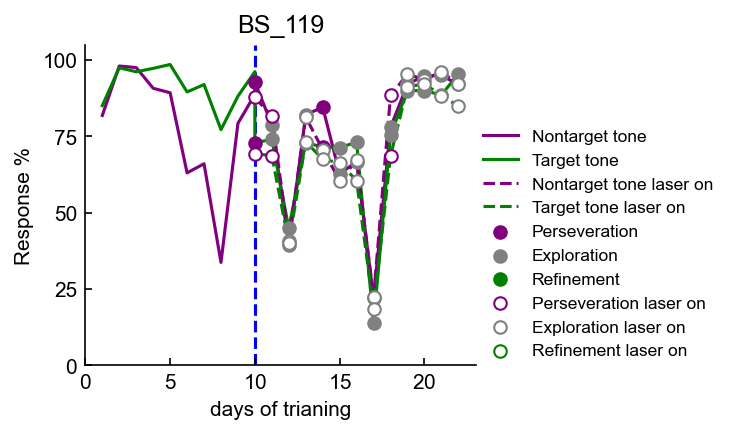

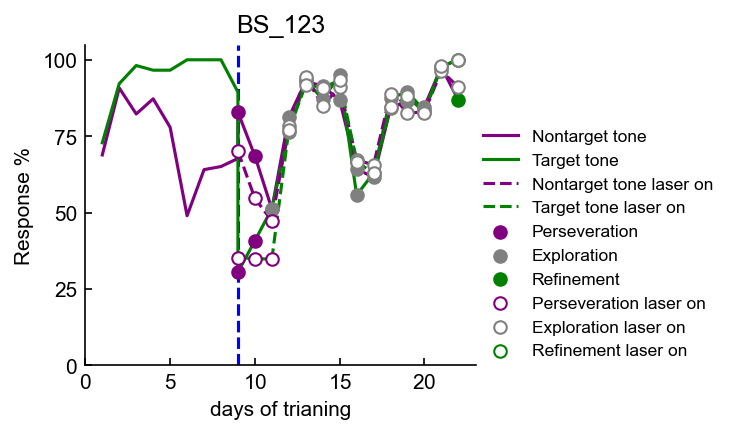

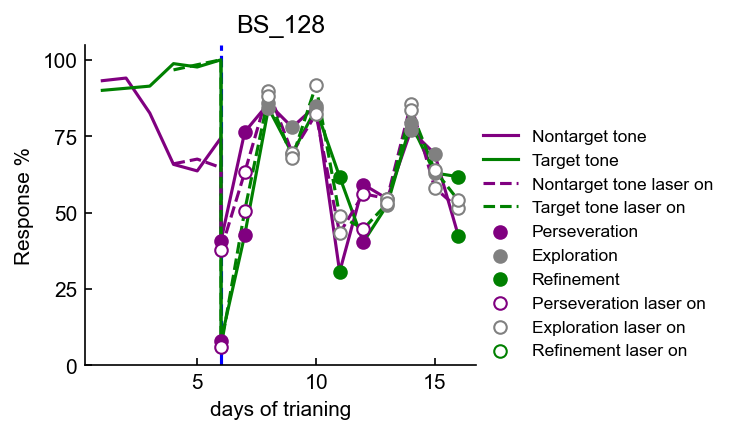

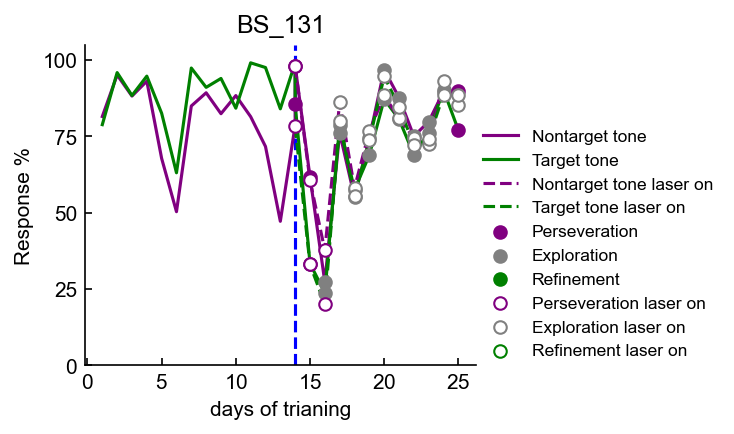

In [72]:
animalnamestouse = opsinnames
for animalname in animalnamestouse:
    #plt.close('all')
    fig, ax = plt.subplots(figsize=(5,3))
    
    #fig = plt.figure(figsize=(10,3))
    #gs = fig.add_gridspec(1,2,hspace=0.2,wspace=0.5)
    #ax = plt.subplot(gs[0,0])#Raster
    #ax_perf = plt.subplot(gs[0,1],sharex=ax)#PSTH
    
    days = []
    perseverationcriterion = []
    explorationcriterion = []
    refinementcriterion = []
    prepost = []
    
    dayson = []
    perseverationcriterionon = []
    explorationcriterionon = []
    refinementcriterionon = []
    preposton = []
    
    inclusion = []
    
    #Laser Off
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.offPreBehavior.hits
                misses = thissession.offPreBehavior.misses
                falarms = thissession.offPreBehavior.falarms
                crejects = thissession.offPreBehavior.crejects

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
                prepost.append(False)
            except Exception as e:
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects

                perseverationcriterion.append(falarms / (falarms+crejects))
                explorationcriterion.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterion.append( (hits) / (hits+misses) )
                days.append(session)
                prepost.append(True)
            except Exception as e:
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    #Laser On
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['prereversal','switch']:
            try:
                hits = thissession.onPreBehavior.hits
                misses = thissession.onPreBehavior.misses
                falarms = thissession.onPreBehavior.falarms
                crejects = thissession.onPreBehavior.crejects

                perseverationcriterionon.append(falarms / (falarms+crejects))
                explorationcriterionon.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterionon.append( (hits) / (hits+misses) )
                dayson.append(session)
                preposton.append(False)
            except Exception as e:
                perseverationcriterionon.append( np.nan )
                explorationcriterionon.append( np.nan )
                refinementcriterionon.append( np.nan )
                dayson.append(session)
                preposton.append(False)
                #print(e)
                pass
    
        if thissession.type in ['postreversal','switch']:
            try:
                hits = thissession.onPostBehavior.hits
                misses = thissession.onPostBehavior.misses
                falarms = thissession.onPostBehavior.falarms
                crejects = thissession.onPostBehavior.crejects

                perseverationcriterionon.append(falarms / (falarms+crejects))
                explorationcriterionon.append( (hits+falarms) / (hits+misses+falarms+crejects) )
                refinementcriterionon.append( (hits) / (hits+misses) )
                dayson.append(session)
                preposton.append(True)
            except Exception as e:
                perseverationcriterionon.append( np.nan )
                explorationcriterionon.append( np.nan )
                refinementcriterionon.append( np.nan )
                dayson.append(session)
                preposton.append(False)
                #print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
            
    #Calculate inclusion criterion
    #assume that number of laser on and laser off trials are exactly equal
    inclusion = np.zeros(len(days))
    for idx,day in enumerate(days):
        if np.isfinite(explorationcriterionon[idx]):
            inclusion[idx] = (explorationcriterion[idx] + explorationcriterionon[idx])/2
        else:
            inclusion[idx]  = explorationcriterion[idx]
    print(animalname)
    print(inclusion)
    inclusion = np.greater_equal(inclusion,0.1)
    print(inclusion)
    
    ax.plot(days,perseverationcriterion,color='purple',label='Nontarget tone')
    ax.plot(days,refinementcriterion,color='green',label='Target tone')
    
    if animalname in opsinnames:
        ax.plot(dayson,perseverationcriterionon,color='purple',linestyle='--',label='Nontarget tone laser on')
        ax.plot(dayson,refinementcriterionon,color='green',linestyle='--',label='Target tone laser on')
    
    #########################################################################################################
    
    threshold = 0.1
    for idx,day in enumerate(days):
        if not inclusion[idx]:
            print('skip ' + str(idx))
            continue
        if prepost[idx]:
            criterion = refinementcriterion[idx] - perseverationcriterion[idx]
            if criterion <= -threshold:
                thiscolor = 'purple'
            elif criterion >= threshold:
                thiscolor = 'green'
            else:
                thiscolor = 'grey'
            ax.scatter(days[idx],perseverationcriterion[idx],color=thiscolor,zorder=10)
            ax.scatter(days[idx],refinementcriterion[idx],color=thiscolor,zorder=10)
    ax.scatter([],[],color='purple',label='Perseveration')
    ax.scatter([],[],color='grey',label='Exploration')
    ax.scatter([],[],color='green',label='Refinement')
    
    #Laser On
    if animalname in opsinnames:
        for idx,day in enumerate(dayson):
            if not inclusion[idx]:
                print('skip ' + str(idx))
                continue
            if preposton[idx]:
                criterion = refinementcriterionon[idx] - perseverationcriterionon[idx]
                if criterion <= -threshold:
                    thiscolor = 'purple'
                elif criterion >= threshold:
                    thiscolor = 'green'
                else:
                    thiscolor = 'grey'
                ax.scatter(dayson[idx],perseverationcriterionon[idx],fc='white',edgecolor=thiscolor,zorder=10)
                ax.scatter(dayson[idx],refinementcriterionon[idx],fc='white',edgecolor=thiscolor,zorder=10)
        ax.scatter([],[],fc='white',edgecolor='purple',label='Perseveration laser on')
        ax.scatter([],[],fc='white',edgecolor='grey',label='Exploration laser on')
        ax.scatter([],[],fc='white',edgecolor='green',label='Refinement laser on')
    
    ax.set_ylim(0,1.05)
    ax.set_yticks([0,0.25,0.5,0.75,1])
    ax.set_yticklabels(['0','25','50','75','100'])
    
    ax.plot([animalBehaviors[animalname].reversal]*2,[0,1.05],color='blue',linestyle='--',zorder=-10)
    
    ax.set_ylabel('Response %')
    ax.set_xlabel('days of trianing')
    ax.legend(frameon=False,loc=(1,0))
    ax.set_title(animalname)
    
    #break
    plt.tight_layout()
    fig.savefig(os.path.join('D:\\\\Figures','Learning Phases',animalname + ' Learning Phases by day.png'),transparent=False,facecolor="white")
    fig.savefig(os.path.join('D:\\\\Figures','Learning Phases',animalname + ' Learning Phases by day.pdf'),transparent=False,facecolor="white")

In [54]:
threshold = 0.1

daysOfPerseverationOpsin = []
daysOfPerseverationOpsinOn = []
daysOfPerseverationOpsinOff = []
daysOfPerseverationNaive = []
daysOfPerseverationDual = []

daysOfExplorationOpsin = []
daysOfExplorationOpsinOn = []
daysOfExplorationOpsinOff = []
daysOfExplorationNaive = []
daysOfExplorationDual = []

daysOfRefinementOpsin = []
daysOfRefinementOpsinOn = []
daysOfRefinementOpsinOff = []
daysOfRefinementNaive = []
daysOfRefinementDual = []

#Opsin
for animalname in opsinnames:
    thisanimalpdays = 0
    thisanimaledays = 0
    thisanimalrdays = 0
    expert = 0
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['postreversal','switch']:
            
            if thissession.pc_sessions >= 0.7 and thissession.dp_sessions >= 1.5:
                expert+=1
            if expert > 2:
                break
                
            try:
                hits = thissession.offPostBehavior.hits + thissession.onPostBehavior.hits
                misses = thissession.offPostBehavior.misses + thissession.onPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms + thissession.onPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects + thissession.onPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)

                perseverationcriterion = falarms / (falarms+crejects)
                refinementcriterion = hits / (hits+misses)
                
                if explorationcriterion >= 0.1:
                    if refinementcriterion - perseverationcriterion <= -threshold:
                        thisanimalpdays += 1
                    elif refinementcriterion - perseverationcriterion >= threshold:
                        thisanimalrdays += 1
                    else:
                        thisanimaledays += 1
                
            except Exception as e:
                print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    daysOfPerseverationOpsin.append(thisanimalpdays)
    daysOfExplorationOpsin.append(thisanimaledays)
    daysOfRefinementOpsin.append(thisanimalrdays)
    
#Opsin - On
for animalname in opsinnames:
    thisanimalpdays = 0
    thisanimaledays = 0
    thisanimalrdays = 0
    expert = 0
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['postreversal','switch']:
            
            if thissession.pc_sessions >= 0.7 and thissession.dp_sessions >= 1.5:
                expert+=1
            if expert > 2:
                break
                
            try:
                hits = thissession.offPostBehavior.hits + thissession.onPostBehavior.hits
                misses = thissession.offPostBehavior.misses + thissession.onPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms + thissession.onPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects + thissession.onPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)
                
                hits = thissession.onPostBehavior.hits
                misses = thissession.onPostBehavior.misses
                falarms = thissession.onPostBehavior.falarms
                crejects = thissession.onPostBehavior.crejects

                perseverationcriterion = falarms / (falarms+crejects)
                refinementcriterion = hits / (hits+misses)
                
                if explorationcriterion >= 0.1:
                    if refinementcriterion - perseverationcriterion <= -threshold:
                        thisanimalpdays += 1
                    elif refinementcriterion - perseverationcriterion >= threshold:
                        thisanimalrdays += 1
                    else:
                        thisanimaledays += 1
                
            except Exception as e:
                print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    daysOfPerseverationOpsinOn.append(thisanimalpdays)
    daysOfExplorationOpsinOn.append(thisanimaledays)
    daysOfRefinementOpsinOn.append(thisanimalrdays)
    
#Opsin - Off
for animalname in opsinnames:
    thisanimalpdays = 0
    thisanimaledays = 0
    thisanimalrdays = 0
    expert = 0
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
        
        if thissession.type in ['postreversal','switch']:
            
            if thissession.pc_sessions >= 0.7 and thissession.dp_sessions >= 1.5:
                expert+=1
            if expert > 2:
                break
                
            try:
                hits = thissession.offPostBehavior.hits + thissession.onPostBehavior.hits
                misses = thissession.offPostBehavior.misses + thissession.onPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms + thissession.onPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects + thissession.onPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)
                
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects

                perseverationcriterion = falarms / (falarms+crejects)
                refinementcriterion = hits / (hits+misses)
                
                if explorationcriterion >= 0.1:
                    if refinementcriterion - perseverationcriterion <= -threshold:
                        thisanimalpdays += 1
                    elif refinementcriterion - perseverationcriterion >= threshold:
                        thisanimalrdays += 1
                    else:
                        thisanimaledays += 1
                
            except Exception as e:
                print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    daysOfPerseverationOpsinOff.append(thisanimalpdays)
    daysOfExplorationOpsinOff.append(thisanimaledays)
    daysOfRefinementOpsinOff.append(thisanimalrdays)
    
#Naive
for animalname in naivenames:
    thisanimalpdays = 0
    thisanimaledays = 0
    thisanimalrdays = 0
    expert = 0
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
    
        if thissession.type in ['postreversal','switch']:
            
            if thissession.pc_sessions >= 0.7 and thissession.dp_sessions >= 1.5:
                expert+=1
            if expert > 2:
                break
            
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)

                perseverationcriterion = falarms / (falarms+crejects)
                refinementcriterion = hits / (hits+misses)
                
                if explorationcriterion >= 0.1:
                    if refinementcriterion - perseverationcriterion <= -threshold:
                        thisanimalpdays += 1
                    elif refinementcriterion - perseverationcriterion >= threshold:
                        thisanimalrdays += 1
                    else:
                        thisanimaledays += 1
                
            except Exception as e:
                print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    daysOfPerseverationNaive.append(thisanimalpdays)
    daysOfExplorationNaive.append(thisanimaledays)
    daysOfRefinementNaive.append(thisanimalrdays)
    
#Dual
for animalname in dualnames:
    thisanimalpdays = 0
    thisanimaledays = 0
    thisanimalrdays = 0
    expert = 0
    for session in animalBehaviors[animalname].sessions:
        thissession = animalBehaviors[animalname].sessions[session]
    
        if thissession.type in ['postreversal','switch']:
            
            if thissession.pc_sessions >= 0.7 and thissession.dp_sessions >= 1.5:
                expert+=1
            if expert > 2:
                break
            
            try:
                hits = thissession.offPostBehavior.hits
                misses = thissession.offPostBehavior.misses
                falarms = thissession.offPostBehavior.falarms
                crejects = thissession.offPostBehavior.crejects
                explorationcriterion = (hits+falarms) / (hits+misses+falarms+crejects)

                perseverationcriterion = falarms / (falarms+crejects)
                refinementcriterion = hits / (hits+misses)
                
                if explorationcriterion >= 0.1:
                    if refinementcriterion - perseverationcriterion <= -threshold:
                        thisanimalpdays += 1
                    elif refinementcriterion - perseverationcriterion >= threshold:
                        thisanimalrdays += 1
                    else:
                        thisanimaledays += 1
                
            except Exception as e:
                print(animalname + ' ' + str(session) + ': ' + str(e))
                pass
    
    daysOfPerseverationDual.append(thisanimalpdays)
    daysOfExplorationDual.append(thisanimaledays)
    daysOfRefinementDual.append(thisanimalrdays)
    

            
    #########################################################################################################

print(daysOfExplorationDual)
print(daysOfRefinementDual)
    
#     OpsinDays = np.mean(daysOfPerseverationOpsin)
#     NonopsinDays = np.mean(daysOfPerseverationNonopsin)
    
#     OpsinDaysSEM = sem(daysOfPerseverationOpsin)
#     NonopsinDaysSEM = sem(daysOfPerseverationNonopsin)
    
#     OpsinDaysSTD = np.std(daysOfPerseverationOpsin)
#     NonopsinDaysSTD = np.std(daysOfPerseverationNonopsin)
    
    #break
    #fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Dual',animalname + ' Learning Phases by day.png'),transparent=False,facecolor="white")
    #fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Dual',animalname + ' Learning Phases by day.pdf'),transparent=False,facecolor="white")

[3, 12, 6, 5, 4, 1, 7, 4, 3, 6, 5, 9, 6, 6]
[4, 2, 6, 7, 9, 3, 4, 3, 5, 4, 10, 1, 3, 8]


naive to all p-value (mann-whitney u test): 0.034370948160624214
dual to all  p-value (mann-whitney u test): 0.019695931500755354
naive to on p-value (mann-whitney u test): 0.0734907166915211
dual to on  p-value (mann-whitney u test): 0.045930420543981845
naive to off p-value (mann-whitney u test): 0.04560116869222629
dual to off  p-value (mann-whitney u test): 0.015511833907405742


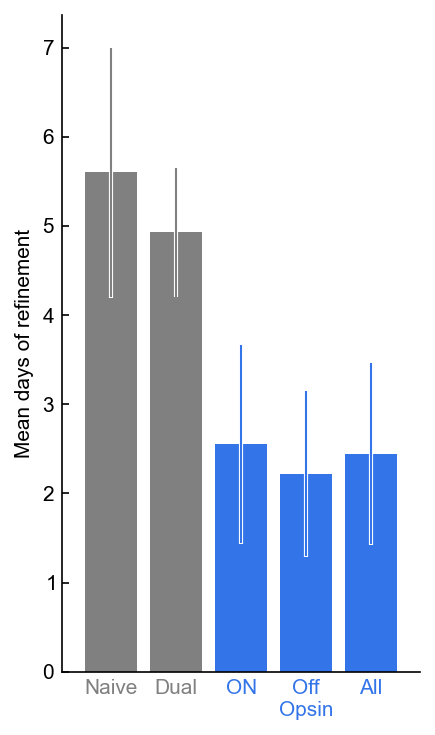

In [61]:
# phase = 'perseveration'
# phase = 'exploration'
phase = 'refinement'

if phase == 'perseveration':
    OpsinDays = np.mean(daysOfPerseverationOpsin)
    OpsinOnDays = np.mean(daysOfPerseverationOpsinOn)
    OpsinOffDays = np.mean(daysOfPerseverationOpsinOff)
    NaiveDays = np.mean(daysOfPerseverationNaive)
    DualDays = np.mean(daysOfPerseverationDual)
    
    OpsinDaysSEM = sem(daysOfPerseverationOpsin)
    OpsinOnDaysSEM = sem(daysOfPerseverationOpsinOn)
    OpsinOffDaysSEM = sem(daysOfPerseverationOpsinOff)
    NaiveDaysSEM = sem(daysOfPerseverationNaive)
    DualDaysSEM = sem(daysOfPerseverationDual)
    
    OpsinDaysSTD = np.std(daysOfPerseverationOpsin)
    OpsinOnDaysSTD = np.std(daysOfPerseverationOpsinOn)
    OpsinOffDaysSTD = np.std(daysOfPerseverationOpsinOff)
    NaiveDaysSTD = np.std(daysOfPerseverationNaive)
    DualDaysSTD = np.std(daysOfPerseverationDual)
elif phase == 'exploration':
    OpsinDays = np.mean(daysOfExplorationOpsin)
    OpsinOnDays = np.mean(daysOfExplorationOpsinOn)
    OpsinOffDays = np.mean(daysOfExplorationOpsinOff)
    NaiveDays = np.mean(daysOfExplorationNaive)
    DualDays = np.mean(daysOfExplorationDual)
    
    OpsinDaysSEM = sem(daysOfExplorationOpsin)
    OpsinOnDaysSEM = sem(daysOfExplorationOpsinOn)
    OpsinOffDaysSEM = sem(daysOfExplorationOpsinOff)
    NaiveDaysSEM = sem(daysOfExplorationNaive)
    DualDaysSEM = sem(daysOfExplorationDual)
    
    OpsinDaysSTD = np.std(daysOfExplorationOpsin)
    OpsinOnDaysSTD = np.std(daysOfExplorationOpsinOn)
    OpsinOffDaysSTD = np.std(daysOfExplorationOpsinOff)
    NaiveDaysSTD = np.std(daysOfExplorationNaive)
    DualDaysSTD = np.std(daysOfExplorationDual)
elif phase == 'refinement':
    OpsinDays = np.mean(daysOfRefinementOpsin)
    OpsinOnDays = np.mean(daysOfRefinementOpsinOn)
    OpsinOffDays = np.mean(daysOfRefinementOpsinOff)
    NaiveDays = np.mean(daysOfRefinementNaive)
    DualDays = np.mean(daysOfRefinementDual)
    OpsinDaysSEM = sem(daysOfRefinementOpsin)
    OpsinOnDaysSEM = sem(daysOfRefinementOpsinOn)
    OpsinOffDaysSEM = sem(daysOfRefinementOpsinOff)
    NaiveDaysSEM = sem(daysOfRefinementNaive)
    OpsinDaysSTD = np.std(daysOfRefinementOpsin)
    OpsinOnDaysSTD = np.std(daysOfRefinementOpsinOn)
    OpsinOffDaysSTD = np.std(daysOfRefinementOpsinOff)
    NaiveDaysSTD = np.std(daysOfRefinementNaive)

fig,ax = plt.subplots(figsize=(3,5))
ax.bar([0],[NaiveDays],color='grey')#,width=0.45)
ax.bar([1],[DualDays],color='grey')#,width=0.45)
ax.bar([2],[OpsinOnDays],color=LASER_COLOR)#,width=0.45)
ax.bar([3],[OpsinOffDays],color=LASER_COLOR)#,width=0.45)
ax.bar([4],[OpsinDays],color=LASER_COLOR)#,width=0.45)
thick = 1
thicksc=2
ax.errorbar([0,1,2,3,4],[NaiveDays,DualDays,OpsinOnDays,OpsinOffDays,OpsinDays],[NaiveDaysSEM*1.01,DualDaysSEM*1.01,OpsinOnDaysSEM*1.01,OpsinOffDaysSEM*1.01,OpsinDaysSEM*1.01],lw=0,elinewidth=thick*thicksc,color='white',zorder=10)
#ax.errorbar([0,1],[FR_OFF,FR_ON],[FR_OFFsem,FR_ONsem],lw=0,elinewidth=thick,capsize=10,capthick=thick,color='k',zorder=11)
ax.errorbar([0],[NaiveDays],[NaiveDaysSEM],lw=0,elinewidth=thick,color='grey',zorder=11)
ax.errorbar([1],[DualDays],[DualDaysSEM],lw=0,elinewidth=thick,color='grey',zorder=11)
ax.errorbar([2],[OpsinOnDays],[OpsinOnDaysSEM],lw=0,elinewidth=thick,color=LASER_COLOR,zorder=11)
ax.errorbar([3],[OpsinOffDays],[OpsinOffDaysSEM],lw=0,elinewidth=thick,color=LASER_COLOR,zorder=11)
ax.errorbar([4],[OpsinDays],[OpsinDaysSEM],lw=0,elinewidth=thick,color=LASER_COLOR,zorder=11)
ax.set_xlim([-0.75,4.75])
#ax.set_ylim([0,8])
#ax.set_yticks([0,2,4,6,8])

ax.set_ylabel('Mean days of ' + str(phase))

ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['Naive','Dual','ON','Off\nOpsin','All'])
ax.tick_params(axis='x',length=0)
colors = ['grey','grey',LASER_COLOR,LASER_COLOR,LASER_COLOR]
[t.set_color(colors[idx]) for idx,t in enumerate(ax.xaxis.get_ticklabels())]

#ax.plot([np.nan],[np.nan],color='k',label='SEM',lw=thick)
#ax.legend(frameon=False,loc='upper right')

plt.tight_layout()
#fig.savefig(os.path.join('D:\\\\Figures','M2 Opsin suppressed cells only bar plot.pdf'),transparent=False,facecolor="white")

if phase == 'perseveration':
    naivepval = mannwhitneyu(daysOfPerseverationNaive,daysOfPerseverationOpsin).pvalue
    dualpval = mannwhitneyu(daysOfPerseverationDual,daysOfPerseverationOpsin).pvalue
    naiveonpval = mannwhitneyu(daysOfPerseverationNaive,daysOfPerseverationOpsinOn).pvalue
    dualonpval = mannwhitneyu(daysOfPerseverationDual,daysOfPerseverationOpsinOn).pvalue
    naiveoffpval = mannwhitneyu(daysOfPerseverationNaive,daysOfPerseverationOpsinOff).pvalue
    dualoffpval = mannwhitneyu(daysOfPerseverationDual,daysOfPerseverationOpsinOff).pvalue
elif phase == 'exploration':
    naivepval = mannwhitneyu(daysOfExplorationNaive,daysOfExplorationOpsin).pvalue
    dualpval = mannwhitneyu(daysOfExplorationDual,daysOfExplorationOpsin).pvalue
    naiveonpval = mannwhitneyu(daysOfExplorationNaive,daysOfExplorationOpsinOn).pvalue
    dualonpval = mannwhitneyu(daysOfExplorationDual,daysOfExplorationOpsinOn).pvalue
    naiveoffpval = mannwhitneyu(daysOfExplorationNaive,daysOfExplorationOpsinOff).pvalue
    dualoffpval = mannwhitneyu(daysOfExplorationDual,daysOfExplorationOpsinOff).pvalue
elif phase == 'refinement':
    naivepval = mannwhitneyu(daysOfRefinementNaive,daysOfRefinementOpsin).pvalue
    dualpval = mannwhitneyu(daysOfRefinementDual,daysOfRefinementOpsin).pvalue
    naiveonpval = mannwhitneyu(daysOfRefinementNaive,daysOfRefinementOpsinOn).pvalue
    dualonpval = mannwhitneyu(daysOfRefinementDual,daysOfRefinementOpsinOn).pvalue
    naiveoffpval = mannwhitneyu(daysOfRefinementNaive,daysOfRefinementOpsinOff).pvalue
    dualoffpval = mannwhitneyu(daysOfRefinementDual,daysOfRefinementOpsinOff).pvalue
#pval = ttest_ind(daysOfPerseverationNaive,daysOfPerseverationOpsin).pvalue
print('naive to all p-value (mann-whitney u test): '+str(naivepval))
print('dual to all  p-value (mann-whitney u test): '+str(dualpval))
print('naive to on p-value (mann-whitney u test): '+str(naiveonpval))
print('dual to on  p-value (mann-whitney u test): '+str(dualonpval))
print('naive to off p-value (mann-whitney u test): '+str(naiveoffpval))
print('dual to off  p-value (mann-whitney u test): '+str(dualoffpval))

fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Comparison ' + phase + ' .png'),transparent=False,facecolor="white")
fig.savefig(os.path.join('D:\\\\Figures','Learning Phases Comparison ' + phase + ' .pdf'),transparent=False,facecolor="white")

In [63]:
PerseverationDays = SimpleNamespace()
PerseverationDays.Naive = daysOfPerseverationNaive
PerseverationDays.Opsin = daysOfPerseverationOpsin
PerseverationDays.DualRecording = daysOfPerseverationDualRecording

print(PerseverationDays)

filename = os.path.join('D:\\Figures','PerseverationDays.pickle')
with open(filename, 'wb') as f:
    pickle.dump(PerseverationDays, f, protocol=pickle.HIGHEST_PROTOCOL)

namespace(DualRecording=[3, 4, 4, 2, 0, 2, 2, 2, 1, 3, 2, 1, 5, 4, 6], Naive=[2, 3, 2, 1, 3], Opsin=[4, 3, 6, 0, 2, 5, 3, 5, 7, 2])


In [65]:
with open(filename,'rb') as f:
    data= pickle.load(f)
print(data)

namespace(DualRecording=[3, 4, 4, 2, 0, 2, 2, 2, 1, 3, 2, 1, 5, 4, 6], Naive=[2, 3, 2, 1, 3], Opsin=[4, 3, 6, 0, 2, 5, 3, 5, 7, 2])


In [ ]:
trials = dict()
for animalname in animalBehaviors:
    trials[animalname] = []

for animalname in animalBehaviors:
    for session in animalBehaviors[animalname].sessions:
        if animalBehaviors[animalname].sessions[session].type != 'pre-reversal':
            continue
            
        session_trials = np.sum(animalBehaviors[animalname].sessions[session].trials_per_session[0])
        trials.append(session_trials)
        
sorted_trials = np.sort(trials)
frac = np.linspace(0,1,num=len(trials))
plt.plot(sorted_trials,frac)

plt.ylim([0,1])
plt.xlim([0,np.max(trials)])
plt.ylabel('Fraction of behavior days')
plt.xlabel('Total trials')

# Generate Learning Phases (from curves)

In [25]:
#dualnames = ['BS_108','BS_113','BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_70','BS_72','BS_83','BS_85','BS_87','BS_95']
#animalnames = dualnames

#Animals missing:
#113,50,83,95
#Animals added:
#61,67,15,16,17,19,22

animalnames = ['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_61','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

animals = dict()
for animal in animalnames:
    animals[animal] = SimpleNamespace()
    animals[animal].name = animal
    
#animals['BS_33'].reversal = 20
animals['BS_67'].reversal = 7
#animals['BS_73'].reversal = np.nan
#animals['BS_78'].reversal = np.nan
animals['BS_108'].reversal = 7
#animals['BS_113'].reversal = 13
animals['BS_40'].reversal = 18
animals['BS_41'].reversal = 6
animals['BS_42'].reversal = 7
animals['BS_49'].reversal = 13
#animals['BS_50'].reversal = 12
animals['BS_51'].reversal = 8
#animals['BS_52'].reversal = 15
animals['BS_56'].reversal = 8
animals['BS_59'].reversal = 7
animals['BS_61'].reversal = 9    ###
animals['BS_70'].reversal = 8
animals['BS_72'].reversal = 6
#animals['BS_83'].reversal = 20
#animals['BS_85'].reversal = 10
animals['BS_87'].reversal = 6
#animals['DS_16'].reversal = 11
#animals['BS_95'].reversal = 8
animals['DS_15'].reversal = 12
animals['DS_19'].reversal = 12

BS_40
BS_41
BS_42
BS_49
BS_51
BS_56
BS_59
BS_61
BS_67
BS_70
BS_72
BS_87
BS_108
DS_15
DS_19


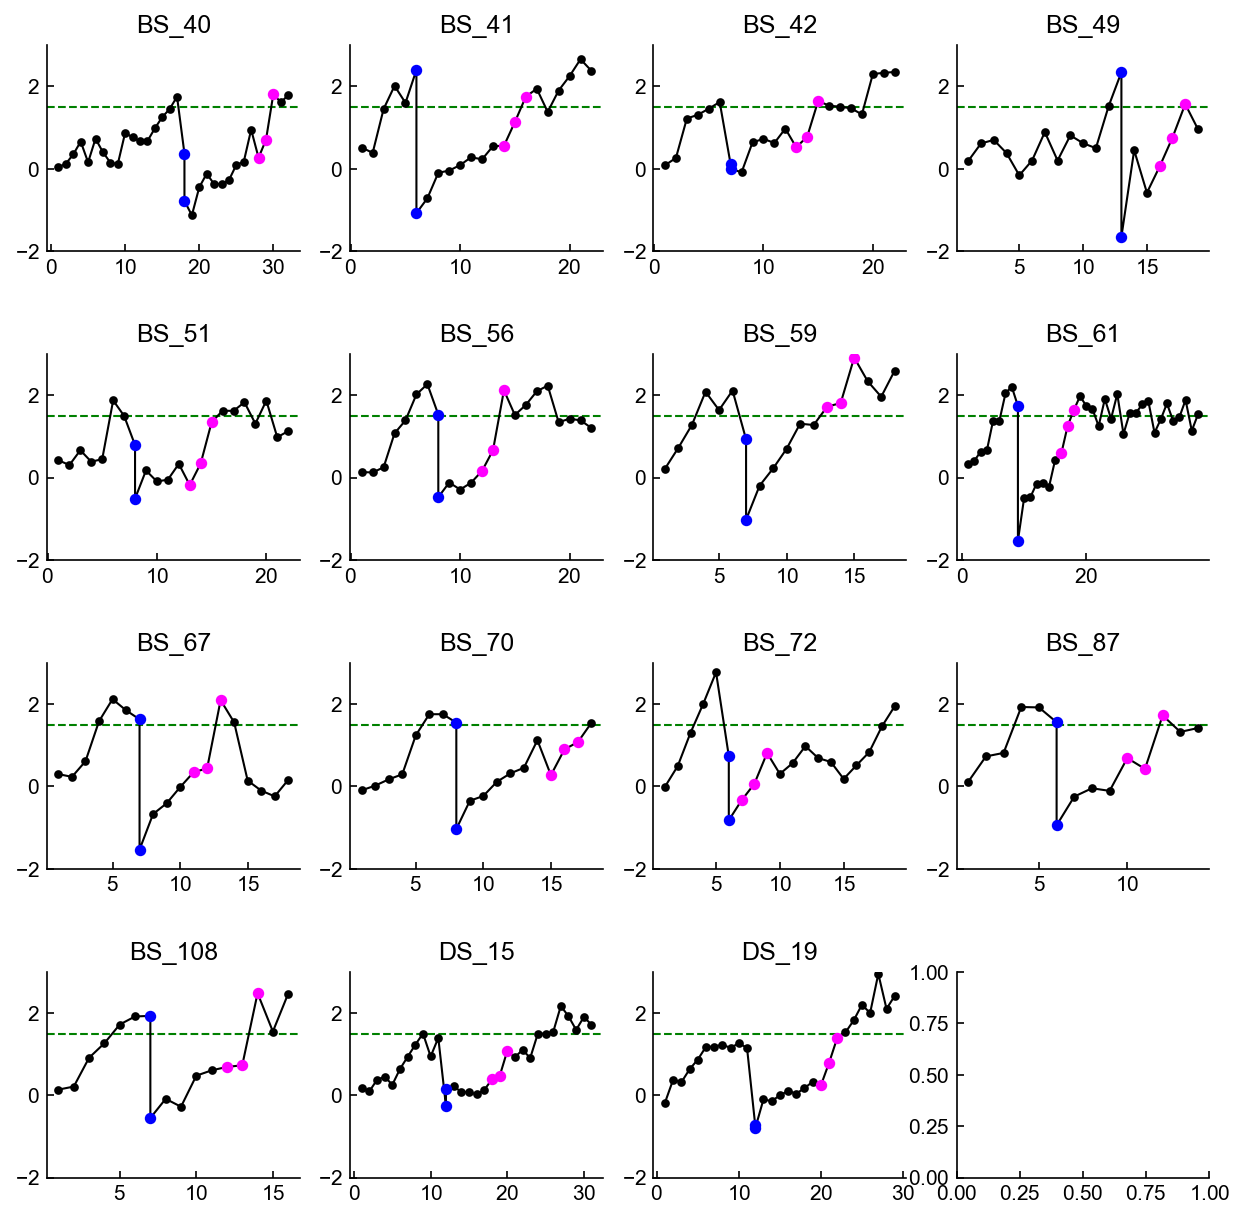

In [26]:
filename = os.path.join('C:\\\\Users','insan','Desktop','DataForJMT.csv')
#filename = os.path.join('C:\\\\Users','4thgr','Desktop','DataForJMT.csv')
csv = pd.read_csv(filename)

postthresholds = dict()

plot=True
if plot:
    fig = plt.figure(figsize=(10,10))
    gs = fig.add_gridspec(4,4,hspace=0.5)
    axs = [plt.subplot(gs[i,j]) for i,j in product(range(4),range(4))]

premiddlecutoffs = dict()
postmiddlecutoffs = dict()
PERphases = dict()

for animalidx,animal in enumerate(animals):
    print(animal)
    
    condname = 'd\' ' + animal
    pc_condname = 'Percent correct ' + animal
    days = np.array(list(csv['Day']))
    cond = csv[condname]
    cond_pc = csv[pc_condname]
    
    #Correct for double reversal days
    for idx,day in enumerate(days):
        if day > animals[animal].reversal:
            days[idx] = day-1
    
    #Make relative to reversal
    #days = days - animals[animal].reversal
    
    max_three_day_slope = -np.Inf
    max_slope_idx = np.nan
    for idx,day in enumerate(days):
        #Skip prereversal and switch days
        if day <= animals[animal].reversal:
            continue
        #Cut off before running over the end
        if idx+2 >= len(days):
            break
            
        slope = cond[idx+2] - cond[idx]
        
        if slope >= max_three_day_slope:
            max_three_day_slope = slope
            max_slope_idx = idx
    
    if plot:
        ax = axs[animalidx]    
        #All Days no color
        ax.plot(days,cond,color='k',lw=1)
        ax.scatter(days,cond,color='k',s=10,zorder=9)
        
        #Switch
        days_involved = days[max_slope_idx:(max_slope_idx+3)]
        conds_involved = cond[max_slope_idx:(max_slope_idx+3)]
        ax.scatter(days_involved,conds_involved,color='magenta',s=20,zorder=10)
        
        switch = np.equal(days,animals[animal].reversal)
        ax.scatter(days[switch],cond[switch],color='b',s=20,zorder=10)

        xlims = ax.get_xlim()
        ax.plot(xlims,[1.5,1.5],c='g',linestyle='--',lw=1,zorder=-10)
        ax.set_xlim(xlims)
        ax.set_ylim([-2,3])

        ax.set_title(animal)
if plot:
    plt.savefig(os.path.join('D:\\\\TempFigures','Three days max slope.png'),transparent=False,facecolor="white")
    pass

# Generate Learning Phases (from curves)

In [23]:
animals_in_cache = []
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    animals_in_cache.append(sessionfile.meta.animal)
for session in tqdm(os.listdir(ops_directory)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    animals_in_cache.append(sessionfile.meta.animal)
animals_in_cache = np.unique(animals_in_cache)

training_days_recorded = dict()
for animal in animals_in_cache:
    training_days_recorded[animal] = []
    
for session in tqdm(os.listdir(act_directory)):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    if sessionfile.meta.region != 'AC':
        continue
    training_days_recorded[sessionfile.meta.animal].append(sessionfile.meta.day_of_training)
for session in tqdm(os.listdir(ops_directory)):
    sessionfile = ilep.loadSessionCached(ops_directory,session)
    if sessionfile.meta.region != 'AC':
        continue
    training_days_recorded[sessionfile.meta.animal].append(sessionfile.meta.day_of_training)
    
print(training_days_recorded['BS_59'])

100%|██████████| 101/101 [00:00<00:00, 233.20it/s]

[]


In [53]:
#dualnames = ['BS_108','BS_113','BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_70','BS_72','BS_83','BS_85','BS_87','BS_95']
#animalnames = dualnames

#Animals missing:
#113,50,83,95
#Animals added:
#61,67,15,16,17,19,22

#animalnames = ['BS_40','BS_41','BS_42','BS_49','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
opsinanimalnames = ['BS_86','BS_92','BS_100','BS_103','BS_111','BS_119','BS_123','BS_128','BS_131','BS_139','BS_163','BS_165','BS_174','BS_179','BS_191','BS_192']
tuninganimalnames = ['BS_213','BS_214']
unuseddualanimals = ['BS_78']

animalnames = np.concatenate([dualanimalnames,opsinanimalnames,tuninganimalnames,unuseddualanimals])

animals = dict()
for animal in animalnames:
    animals[animal] = SimpleNamespace()
    animals[animal].name = animal
    
#Dual Recording Animals
#animals['BS_33'].reversal = 20
animals['BS_67'].reversal = 7
#animals['BS_73'].reversal = np.nan
animals['BS_78'].reversal = np.nan
animals['BS_108'].reversal = 7
#animals['BS_113'].reversal = 13
animals['BS_40'].reversal = 18
animals['BS_41'].reversal = 6
animals['BS_42'].reversal = 7
animals['BS_49'].reversal = 13
animals['BS_50'].reversal = 12
animals['BS_51'].reversal = 8
#animals['BS_52'].reversal = 15
animals['BS_56'].reversal = 8
animals['BS_59'].reversal = 7
#animals['BS_61'].reversal = 9    ###
animals['BS_70'].reversal = 8
animals['BS_72'].reversal = 6
#animals['BS_83'].reversal = 20
#animals['BS_85'].reversal = 10
animals['BS_87'].reversal = 6
#animals['DS_16'].reversal = 11
#animals['BS_95'].reversal = 8
animals['DS_15'].reversal = 12
animals['DS_19'].reversal = 12

#Opsin Animals
animals['BS_86'].reversal = 14
animals['BS_92'].reversal = 9
animals['BS_100'].reversal = 11
animals['BS_103'].reversal = 8
animals['BS_111'].reversal = 8
animals['BS_119'].reversal = 10
animals['BS_123'].reversal = 9
animals['BS_128'].reversal = 6
animals['BS_131'].reversal = 14
animals['BS_139'].reversal = 10
animals['BS_163'].reversal = 13
animals['BS_165'].reversal = np.Inf
animals['BS_174'].reversal = 14
animals['BS_179'].reversal = 16
animals['BS_191'].reversal = 10
animals['BS_192'].reversal = 7

#Tuning Animals
animals['BS_213'].reversal = 8
animals['BS_214'].reversal = np.Inf

print([a for a in animals])

['BS_40', 'BS_41', 'BS_42', 'BS_49', 'BS_50', 'BS_51', 'BS_56', 'BS_59', 'BS_67', 'BS_70', 'BS_72', 'BS_87', 'BS_108', 'DS_15', 'DS_19', 'BS_86', 'BS_92', 'BS_100', 'BS_103', 'BS_111', 'BS_119', 'BS_123', 'BS_128', 'BS_131', 'BS_139', 'BS_163', 'BS_165', 'BS_174', 'BS_179', 'BS_191', 'BS_192', 'BS_213', 'BS_214', 'BS_78']


BS_40
6
BS_41
3
BS_42
3
BS_49
2
BS_50
7
BS_51
6
BS_56
4
BS_59
3
BS_67
4
BS_70
5
BS_72
3
BS_87
4
BS_108
3
DS_15
7
DS_19
4
BS_86
7
BS_92
4
BS_100
3
BS_103
4
BS_111
4
BS_119
5
BS_123
3
BS_128
3
BS_131
5
BS_139
6
BS_163
3
BS_165
BS_165 has no post-reversal
3
BS_174
2
BS_179
8
BS_191
BS_191 has no post-reversal
3
BS_192
6
BS_213
6
BS_214
BS_214 has no post-reversal
inf
BS_78
BS_78 has no post-reversal
inf


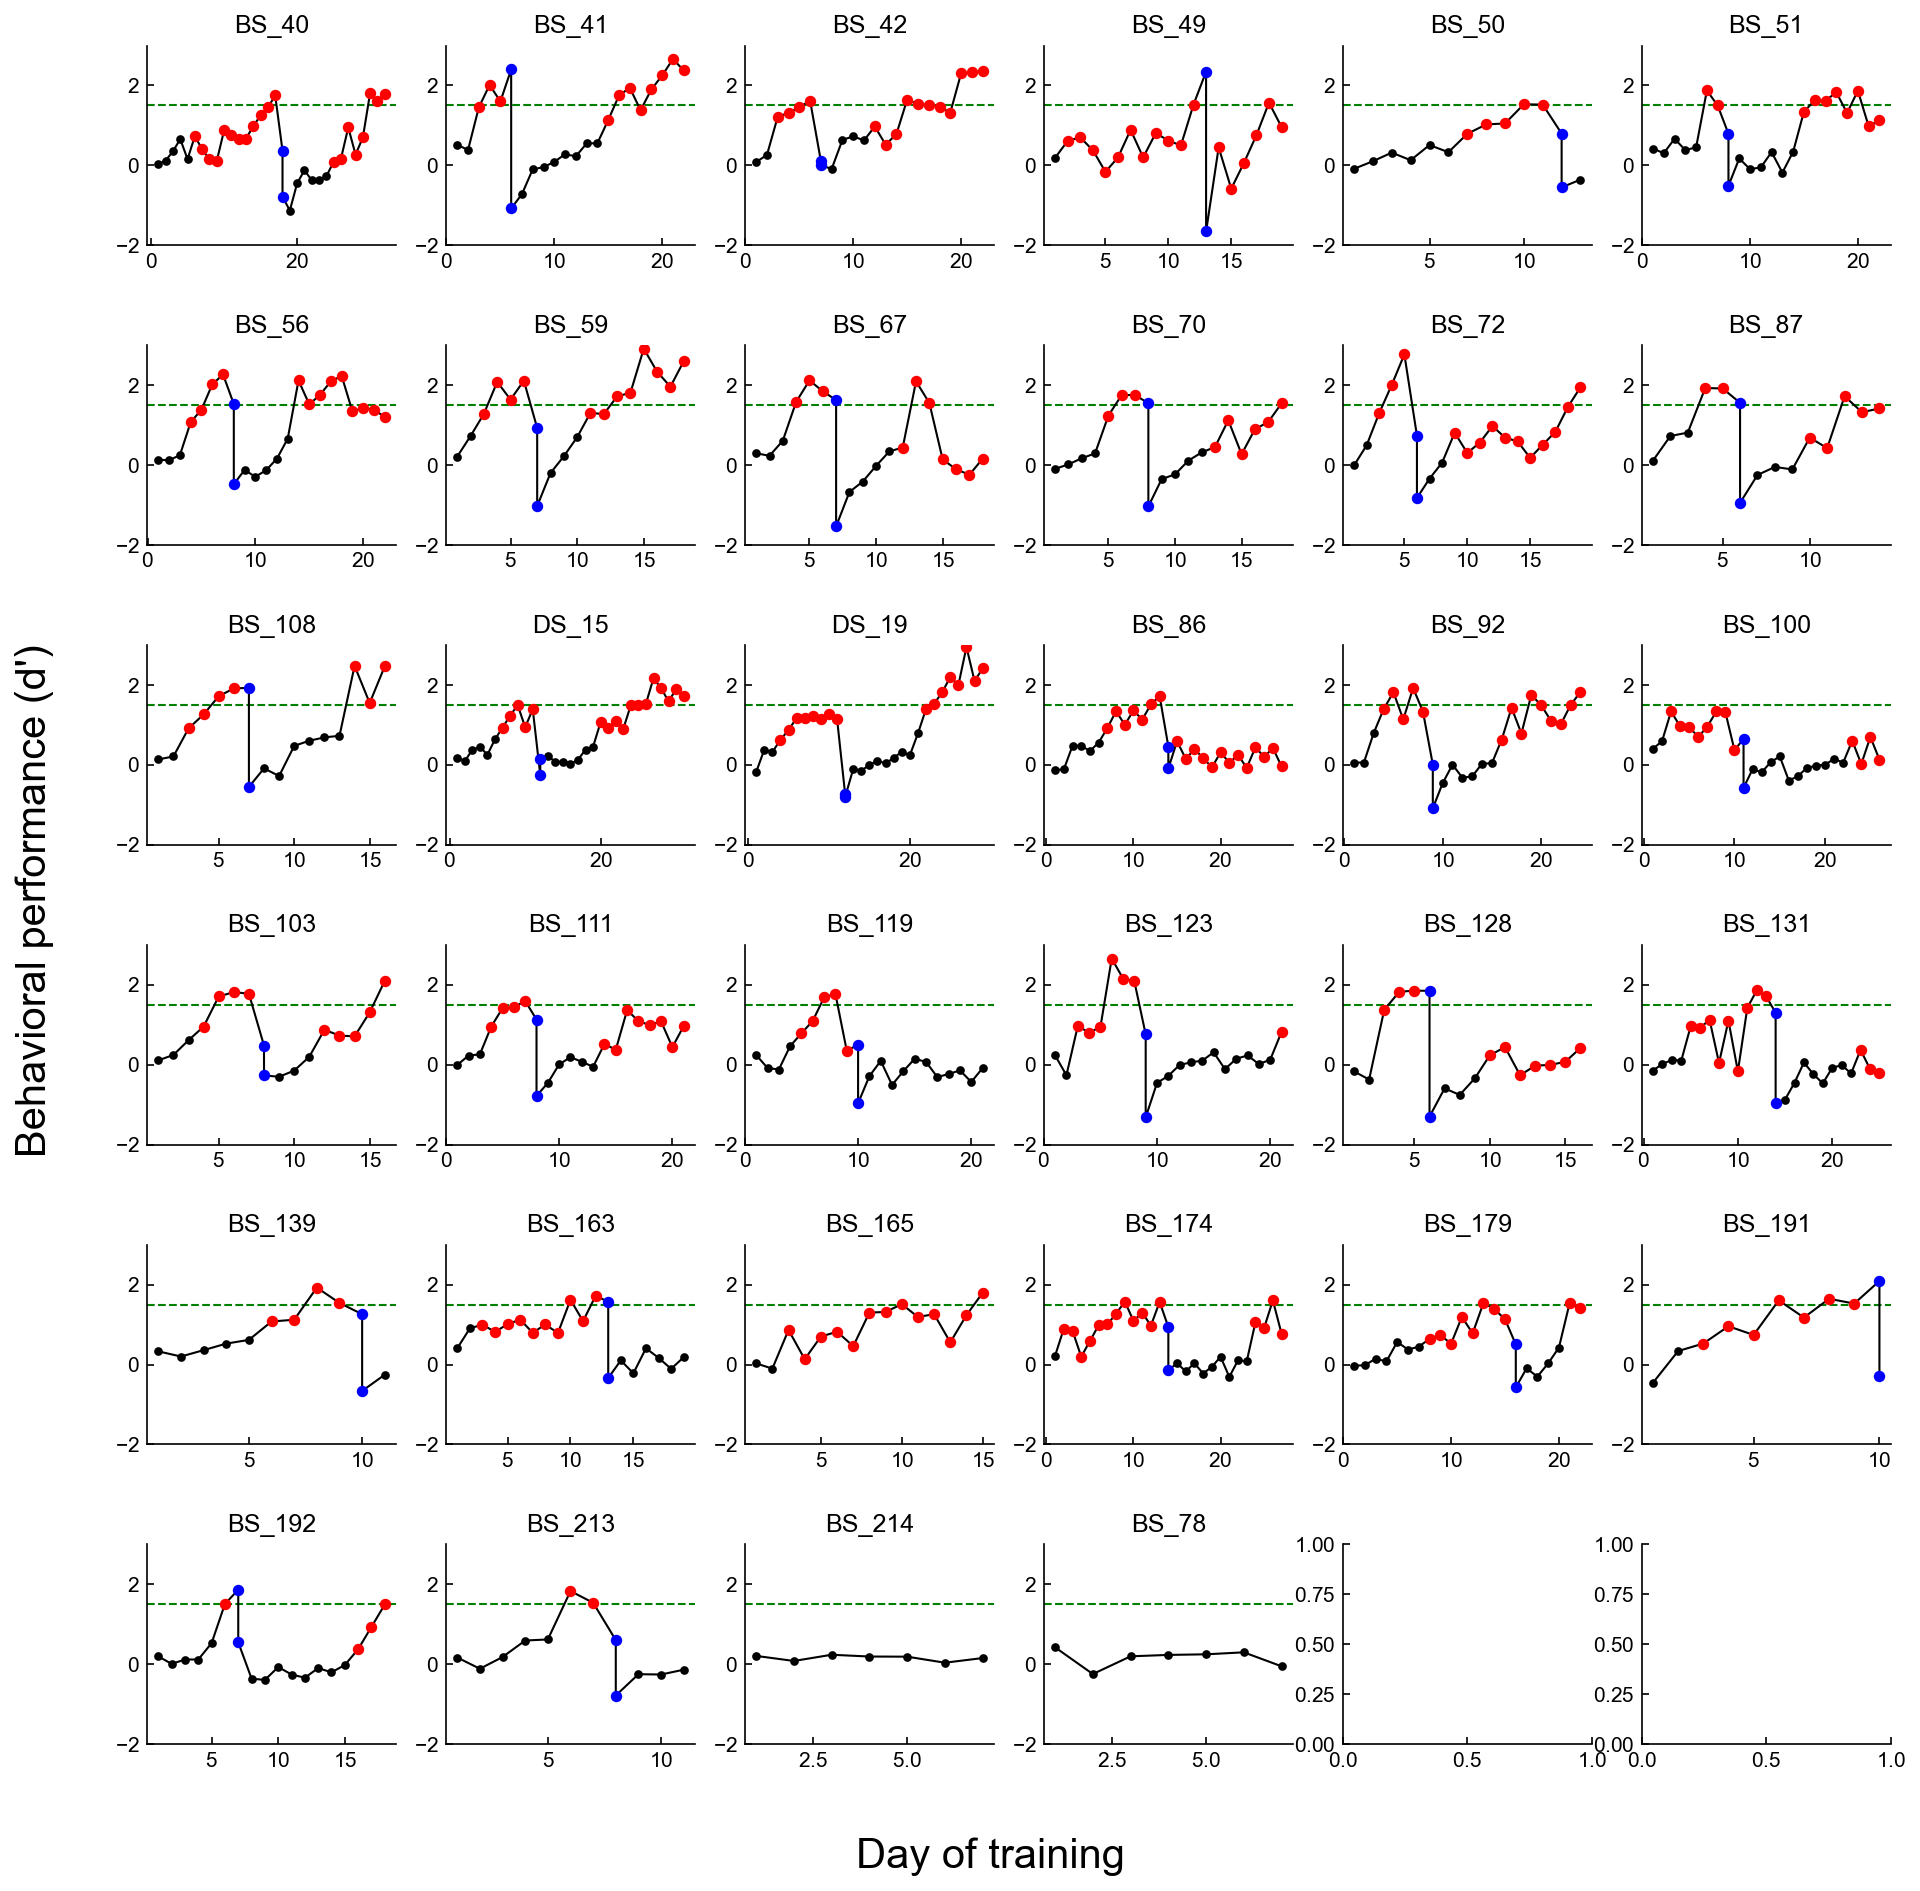

In [54]:
filename = os.path.join('C:\\\\Users','insan','Desktop','DataForJMTTotal.csv')
#filename = os.path.join('C:\\\\Users','4thgr','Desktop','DataForJMT.csv')
csv = pd.read_csv(filename)

postthresholds = dict()

plot=True
if plot:
    fig = plt.figure(figsize=(15,15))
    gs = fig.add_gridspec(6,6,hspace=0.5)
    axs = [plt.subplot(gs[i,j]) for i,j in product(range(6),range(6))]
    #plt.delaxes(axs[14])
    #plt.delaxes(axs[15])

premiddlecutoffs = dict()
postmiddlecutoffs = dict()
PERphases = dict()

for animalidx,animal in enumerate(animals):
    print(animal)
    PERphases[animal] = dict()
    
    condname = 'd\' ' + animal
    pc_condname = 'Percent correct ' + animal
    days = np.array(list(csv['Day']))
    cond = csv[condname]
    cond_pc = csv[pc_condname]
    
    #Correct for double reversal days
    for idx,day in enumerate(days):
        if day > animals[animal].reversal:
            days[idx] = day-1
            
        if day > animals[animal].reversal+1: #  +1 because the csv stores the switch day as two entries
            #Calculate PERphase
            PC = cond_pc[idx]
            if PC <= 47.5:
                PERphases[animal][day-1] = 'perseveration'
            elif PC >= 52.5:
                PERphases[animal][day-1] = 'refinement'
            else:
                PERphases[animal][day-1] = 'exploration'
            
    #days = days - animals[animal].reversal
    
    prereversaldays = []
    prereversaldps = []
    #maxreversaldp = -np.Inf
    #minreversaldp = np.Inf
    postreversaldays = []
    postreversaldps = []
    for idx,day in enumerate(days):
        if day < animals[animal].reversal or np.isnan(animals[animal].reversal):
            prereversaldays.append(day)
            prereversaldps.append(cond[idx])
        if day == animals[animal].reversal:
            maxreversaldp = max(cond[idx],maxreversaldp)
            minreversaldp = min(cond[idx],minreversaldp)
        if day > animals[animal].reversal and not np.isnan(cond[idx]):
            postreversaldays.append(day)
            postreversaldps.append(cond[idx])
            
    #Prereversal threshold
    maxperf = np.nanmax(np.concatenate((prereversaldps,[1.5])))
    minperf = np.nanmin(prereversaldps)
    prethreshold = minperf + 0.4*(maxperf-minperf)
    #Postreversal threshold
    try:
        maxperf = np.nanmax(np.concatenate((postreversaldps,[1.5])))
        minperf = np.nanmin(postreversaldps)
    except:
        print(animal+' has no post-reversal')
        maxperf = np.nan
        minperf = np.nan
    postthreshold = minperf + 0.4*(maxperf-minperf)
    
    postthresholds[animal] = postthreshold
    
    prereversaldays = np.array(prereversaldays)
    prereversaldps = np.array(prereversaldps)
    postreversaldays = np.array(postreversaldays)
    postreversaldps = np.array(postreversaldps)
    
    premiddlebool = np.greater_equal(prereversaldps,prethreshold)
    for idx,day in enumerate(prereversaldays):
        if premiddlebool[idx]:
            premiddlebool[idx:(len(premiddlebool)-1)].fill(True)
        #if not premiddlebool[idx]:
        #    premiddlebool[0:idx].fill(False)
    if np.any(premiddlebool):
        premiddlefirstday = np.min(prereversaldays[premiddlebool])
    else:
        premiddlefirstday = np.Inf
        
    print(premiddlefirstday)
                     
    postmiddlebool = np.greater_equal(postreversaldps,postthreshold)
    for idx,day in enumerate(postreversaldays):
        if postmiddlebool[idx]:
            postmiddlebool[idx:(len(postmiddlebool)-1)].fill(True)
        #if not postmiddlebool[idx]:
        #    postmiddlebool[0:idx].fill(False)
    if np.any(postmiddlebool):
        postmiddlefirstday = np.min(postreversaldays[postmiddlebool])
    else:
        postmiddlefirstday = np.Inf
    
    if animal == 'BS_95':
        premiddlefirstday = 4
    if animal in ['BS_83','BS_50']:
        postmiddlefirstday = np.Inf
    
    premiddlecutoffs[animal] = premiddlefirstday
    postmiddlecutoffs[animal] = postmiddlefirstday
    
    if plot:
        ax = axs[animalidx]    
        #All Days no color
        ax.plot(days,cond,color='k',lw=1)
        ax.scatter(days,cond,color='k',s=10,zorder=9)
        #Pre Middle
        premiddle = np.logical_and( np.greater_equal(days,premiddlefirstday), np.less(days,animals[animal].reversal) )
        ax.scatter(days[premiddle],cond[premiddle],color='r',s=20,zorder=10)
        #Post Middle
        postmiddle = np.greater_equal(days,postmiddlefirstday)
        ax.scatter(days[postmiddle],cond[postmiddle],color='r',s=20,zorder=10)
        #Switch
        switch = np.equal(days,animals[animal].reversal)
        ax.scatter(days[switch],cond[switch],color='b',s=20,zorder=10)

        xlims = ax.get_xlim()
        ax.plot(xlims,[1.5,1.5],c='g',linestyle='--',lw=1,zorder=-10)
        ax.set_xlim(xlims)
        ax.set_ylim([-2,3])
        
        #days_recorded = training_days_recorded[animal]
        #ax.scatter(days_recorded,np.ones_like(days_recorded)*2.9,s=5,marker='*',color='orange',zorder=11)

        ax.set_title(animal)
        
fig.text(0.075, 0.5, 'Behavioral performance (d\')', ha='center', va='center', rotation='vertical',fontsize=20)
fig.text(0.5,0.075, 'Day of training', ha='center', va='center', rotation='horizontal',fontsize=20)

if plot:
    #plt.savefig(os.path.join('D:\\\\TempFigures','EIL Learning Phases.pdf'),transparent=False,facecolor="white")
    pass